<a href="https://colab.research.google.com/github/NotHumans211/Google-Colab/blob/main/Kesejahteraan_Pekerja_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

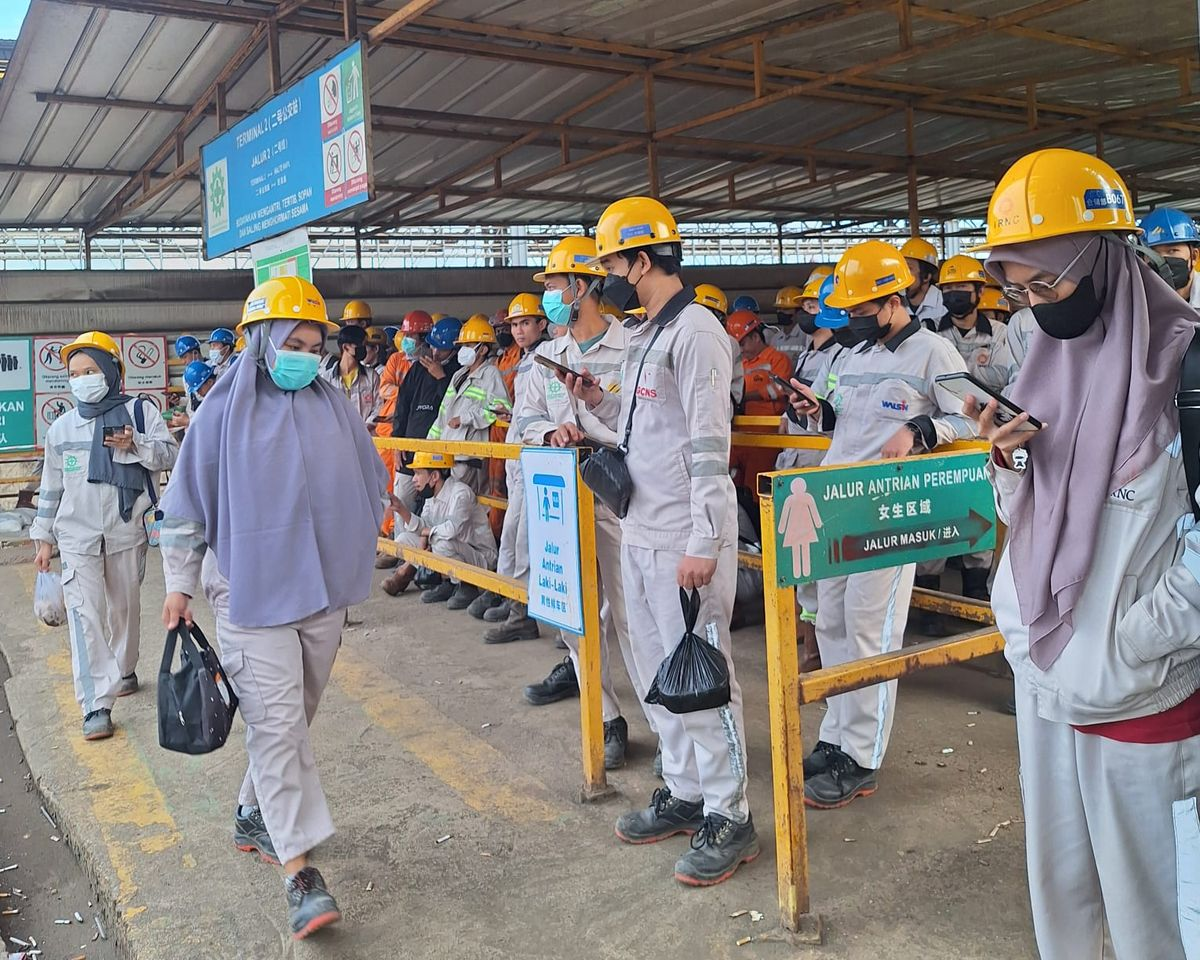

<div align="center">
<h1>Kesejahteraan Pekerja Indonesia</h>

Mungkin kita semua akan mengalami kebingungan dimulai dari di daerah mana kita akan bekerja, berapa upah yang akan didapatkan, serta apakah pendapatan tersebut akan mencukupi untuk kebutuhan sehari-hari. Beberapa hal tersebut menjadikan Analisa Pekerja Sejahtera ini sangat penting dan relevan sebab kondisi persaingan dunia kerja yang sangat ketat sehingga bagi pekerja tentu dibutuhkan perencanaan yang matang termasuk memikirkan kesejahteraannya berdasarkan pilihan-pilihan yang telah dibuat.

**Dataset : (https://www.kaggle.com/datasets/rezkyyayang/pekerja-sejahtera)**

Copyright by Moh Yahya
</div>

#Trend of Wage Growth vs. UMP (Minimum Wage) Over Time

  provinsi  tahun   upah
0     ACEH   2015  11226
1     ACEH   2016  13627
2     ACEH   2017  14809
3     ACEH   2018  13814
4     ACEH   2019  15065
  provinsi  tahun       ump
0     ACEH   2002  330000.0
1     ACEH   2003  425000.0
2     ACEH   2004  550000.0
3     ACEH   2005  620000.0
4     ACEH   2006  820000.0


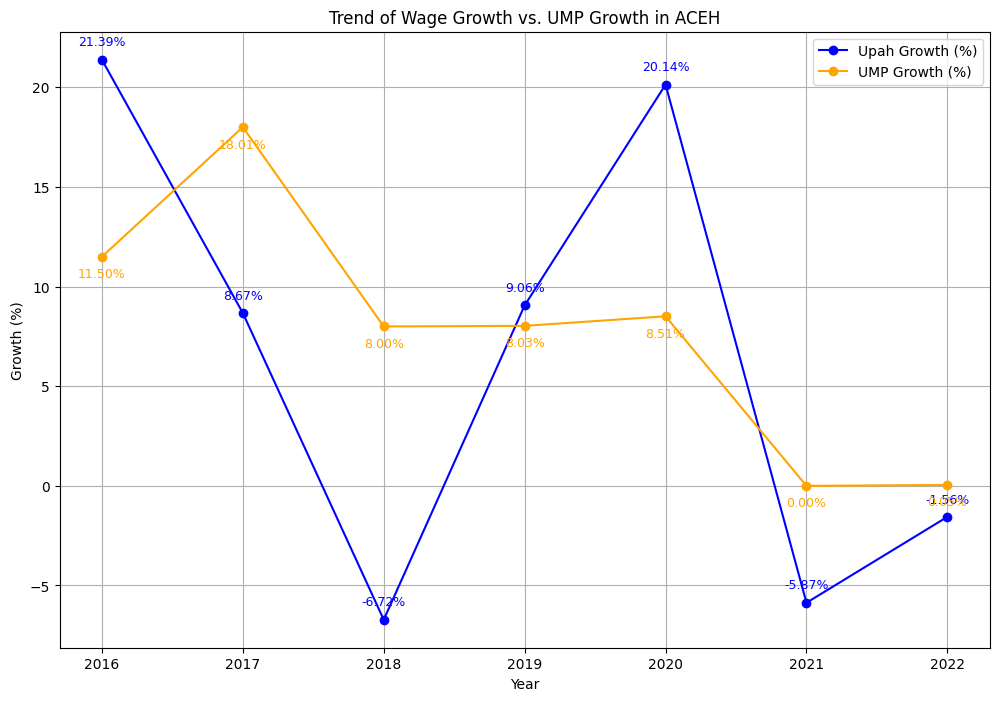

Correlation between Upah Growth and UMP Growth in ACEH: 0.55
Year with highest Upah Growth: 2016
Year with highest UMP Growth: 2017
Average upah Growth in ACEH: 6.45%
Average ump Growth in ACEH: 7.73%


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Load datasets
upah_df = pd.read_csv('pekerja/upah.df.csv')
ump_df = pd.read_csv('pekerja/ump.df.csv')

# Preview the datasets
print(upah_df.head())
print(ump_df.head())

# Merge datasets on 'Provinsi' and 'Tahun'
merged_df = pd.merge(upah_df, ump_df, on=['provinsi', 'tahun'], how='inner')

# Convert 'provinsi' column to uppercase to ensure consistency
merged_df['provinsi'] = merged_df['provinsi'].str.upper()

# Calculate percentage change year over year for 'Upah' and 'UMP'
merged_df['upah_Percent_Change'] = merged_df.groupby('provinsi')['upah'].pct_change() * 100
merged_df['ump_Percent_Change'] = merged_df.groupby('provinsi')['ump'].pct_change() * 100

# Drop NaN values from percentage change calculation
merged_df = merged_df.dropna(subset=['upah_Percent_Change', 'ump_Percent_Change'])

# Check for the existence of 'ACEH' before filtering
if 'ACEH' in merged_df['provinsi'].unique():
    # Plotting the trends for a specific province (e.g., 'ACEH')
    provinsi = 'ACEH'
    provinsi_data = merged_df[merged_df['provinsi'] == provinsi]

    plt.figure(figsize=(12, 8))
    plt.plot(provinsi_data['tahun'], provinsi_data['upah_Percent_Change'], label='Upah Growth (%)', marker='o', color='blue')
    plt.plot(provinsi_data['tahun'], provinsi_data['ump_Percent_Change'], label='UMP Growth (%)', marker='o', color='orange')

    # Annotating the plot with analysis insights
    for i in provinsi_data.index:
        plt.annotate(f"{provinsi_data['upah_Percent_Change'][i]:.2f}%",
                     (provinsi_data['tahun'][i], provinsi_data['upah_Percent_Change'][i]),
                     textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='blue')
        plt.annotate(f"{provinsi_data['ump_Percent_Change'][i]:.2f}%",
                     (provinsi_data['tahun'][i], provinsi_data['ump_Percent_Change'][i]),
                     textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='orange')

    plt.title(f'Trend of Wage Growth vs. UMP Growth in {provinsi}')
    plt.xlabel('Year')
    plt.ylabel('Growth (%)')
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

    # Additional analysis
    # Calculate and print the correlation between upah and ump growth
    correlation = provinsi_data['upah_Percent_Change'].corr(provinsi_data['ump_Percent_Change'])
    print(f"Correlation between Upah Growth and UMP Growth in {provinsi}: {correlation:.2f}")

    # Find the years with the highest growth for upah and ump
    max_upah_year = provinsi_data.loc[provinsi_data['upah_Percent_Change'].idxmax()]['tahun']
    max_ump_year = provinsi_data.loc[provinsi_data['ump_Percent_Change'].idxmax()]['tahun']
    print(f"Year with highest Upah Growth: {max_upah_year}")
    print(f"Year with highest UMP Growth: {max_ump_year}")

    # Compare average growth rates
    average_upah_growth = provinsi_data['upah_Percent_Change'].mean()
    average_ump_growth = provinsi_data['ump_Percent_Change'].mean()
    print(f"Average upah Growth in {provinsi}: {average_upah_growth:.2f}%")
    print(f"Average ump Growth in {provinsi}: {average_ump_growth:.2f}%")
else:
    print("No data available for 'ACEH'. Please check the dataset.")


#Regional Disparities in Wages and Cost of Living


  provinsi  tahun   upah           peng
0     ACEH   2015  11226  534163.777778
1     ACEH   2016  13627  578115.444444
2     ACEH   2017  14809  638003.333333
3     ACEH   2018  13814  685115.111111
4     ACEH   2019  15065  695317.000000


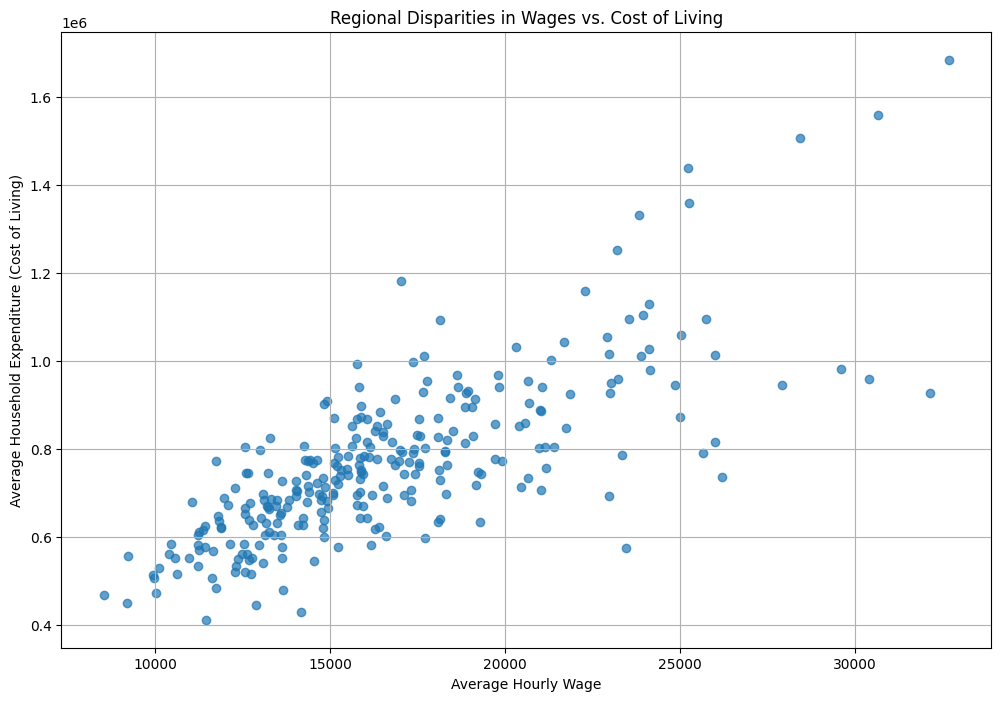

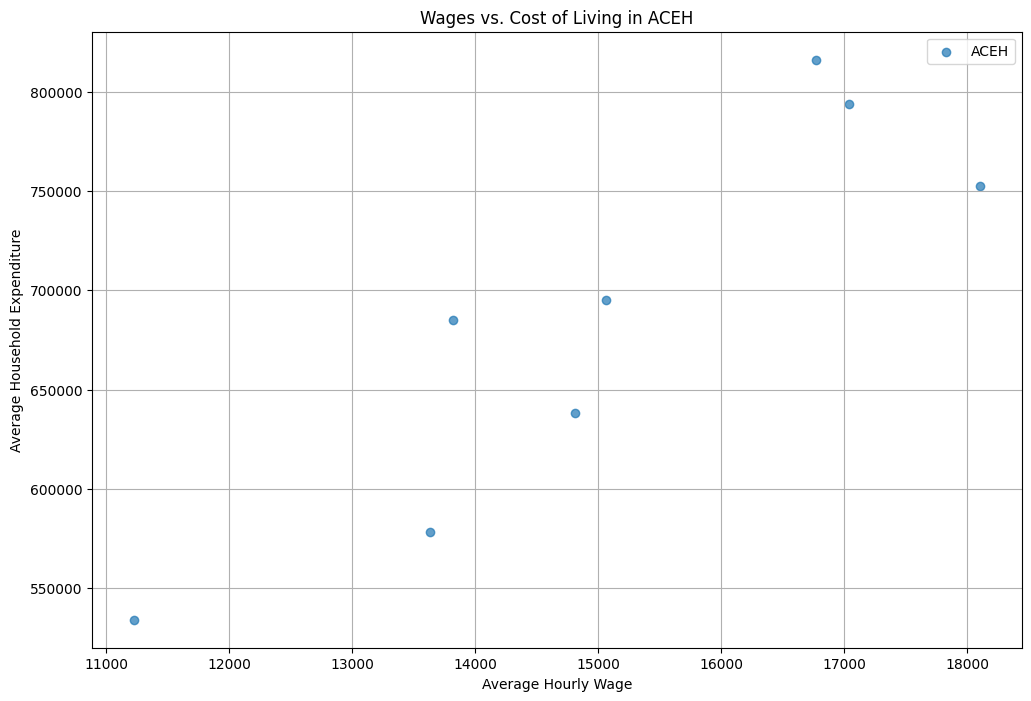

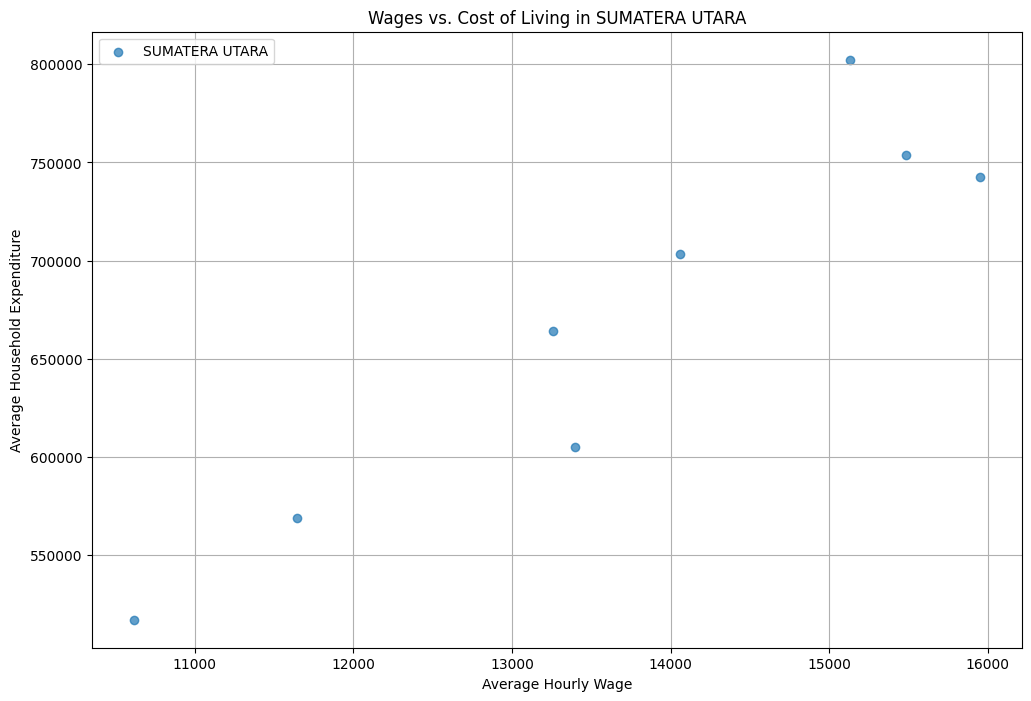

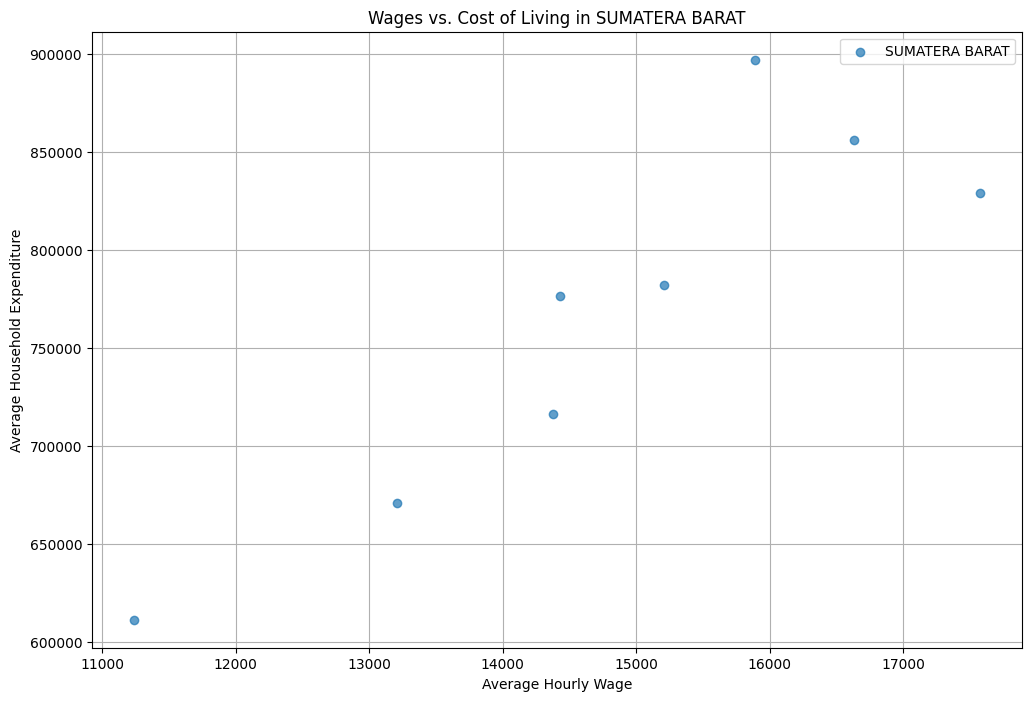

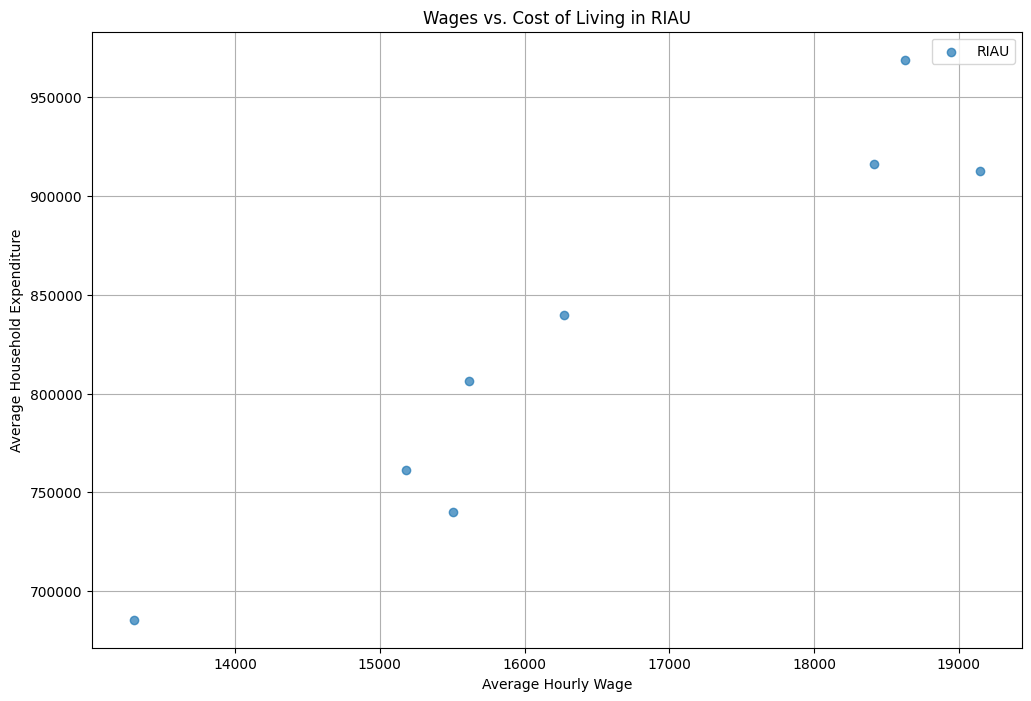

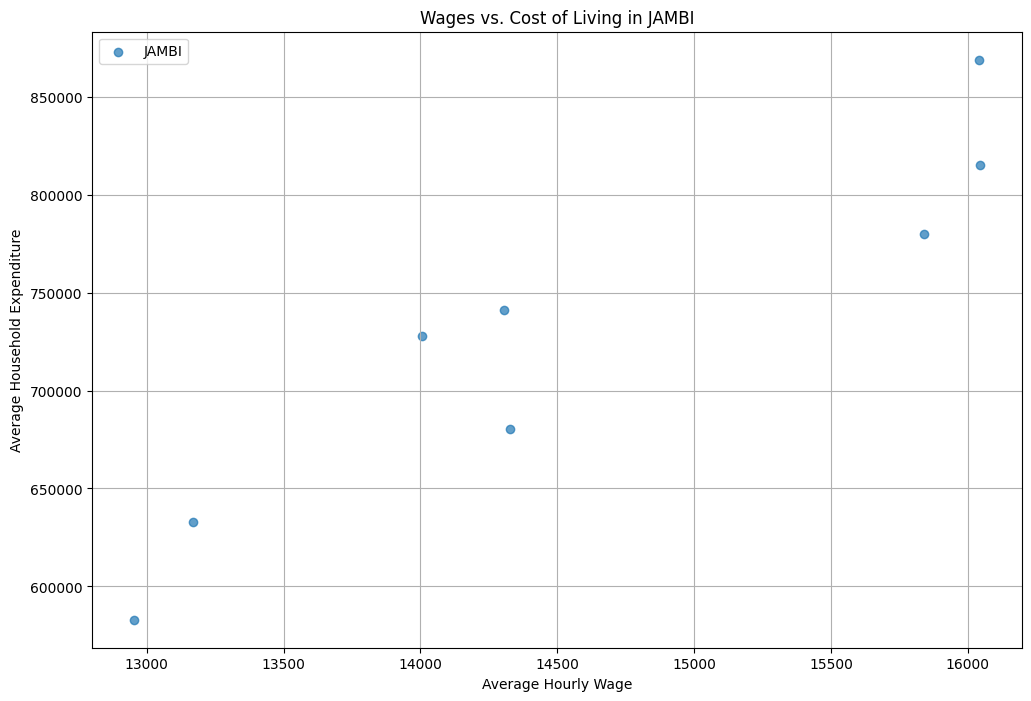

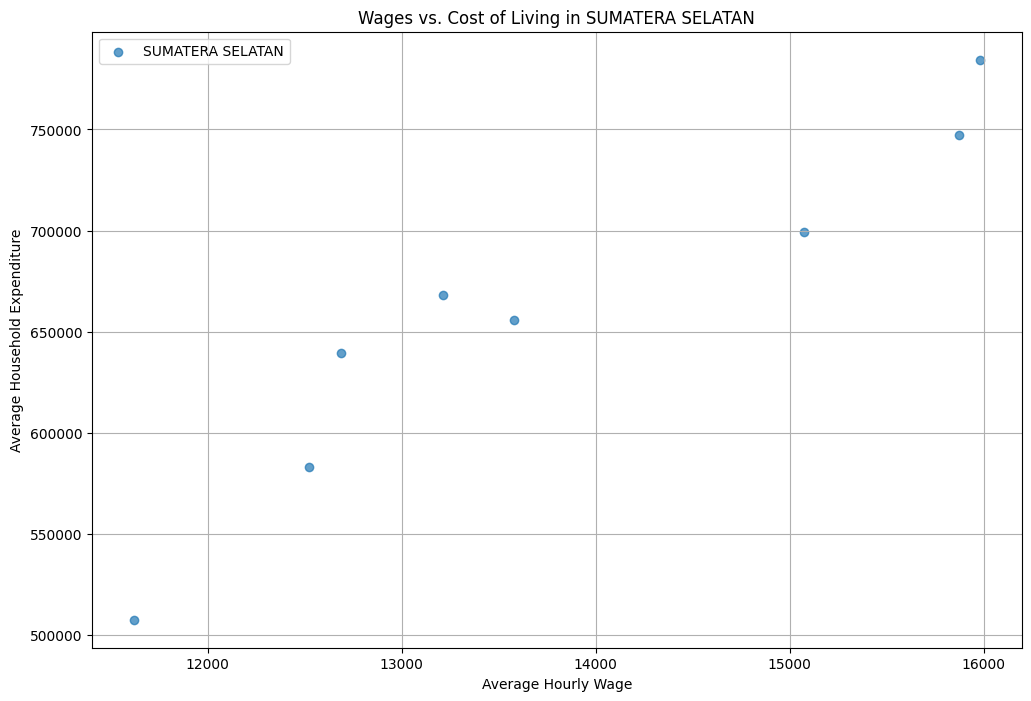

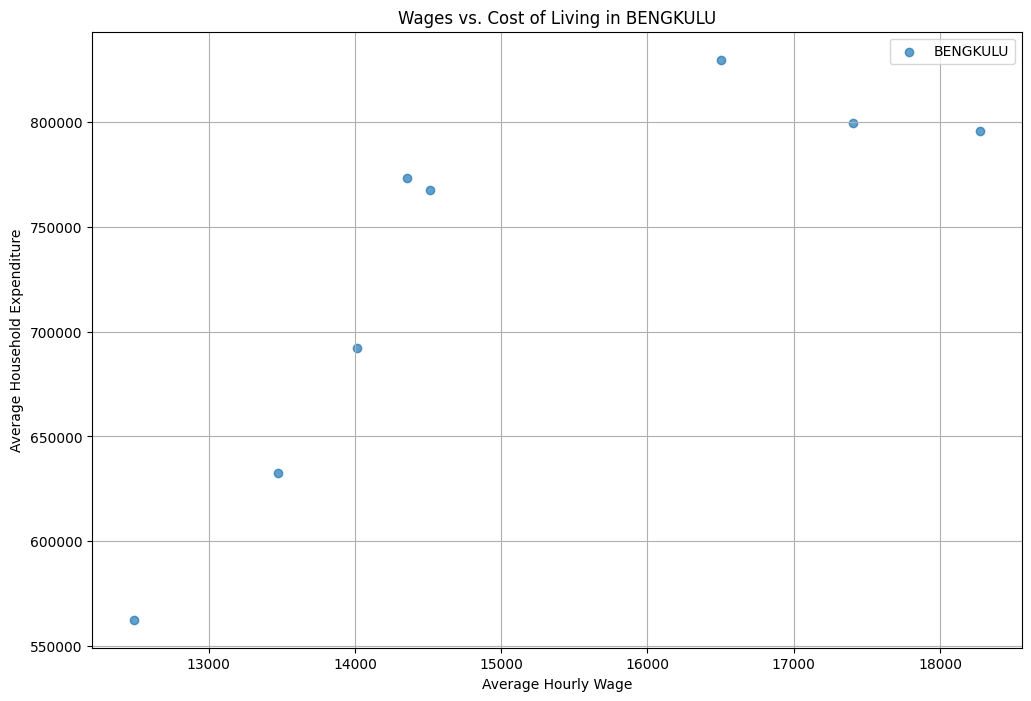

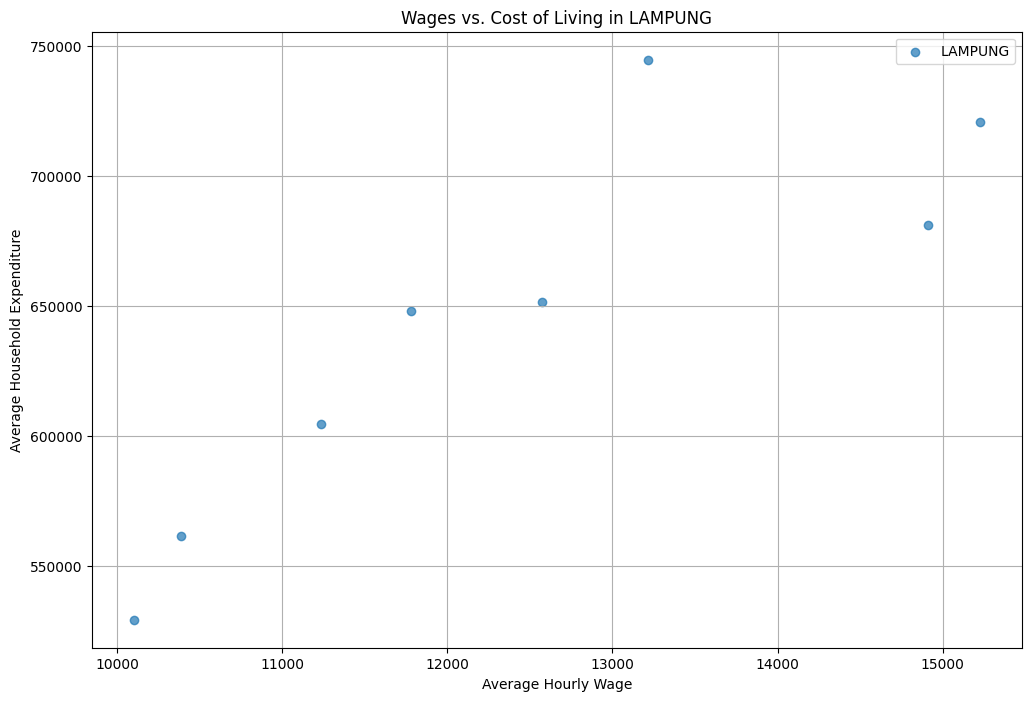

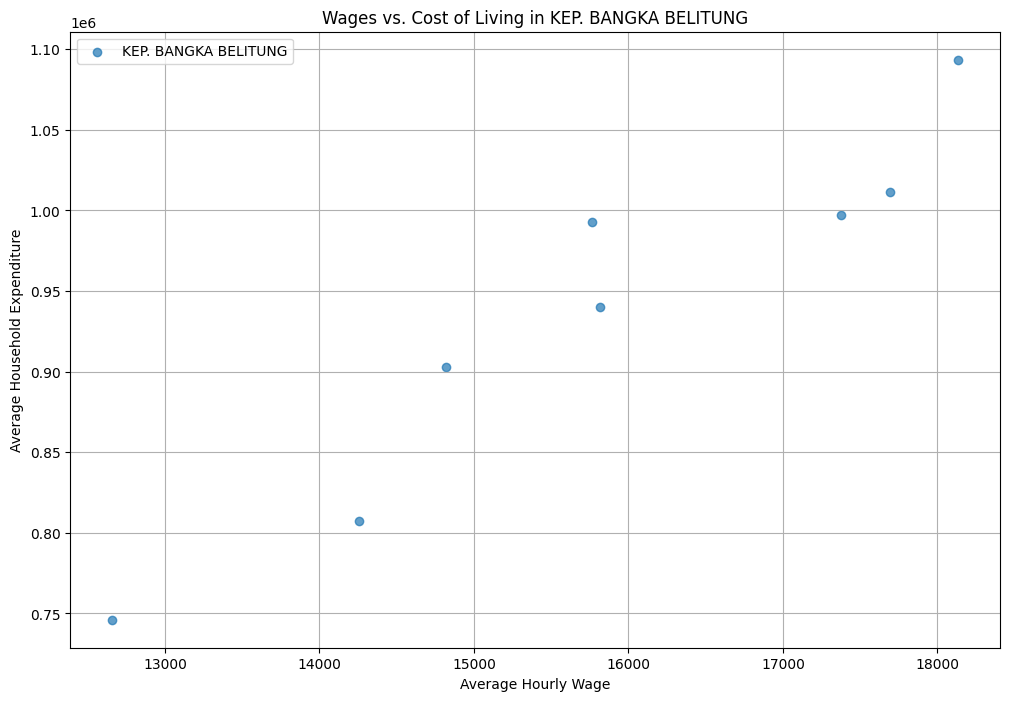

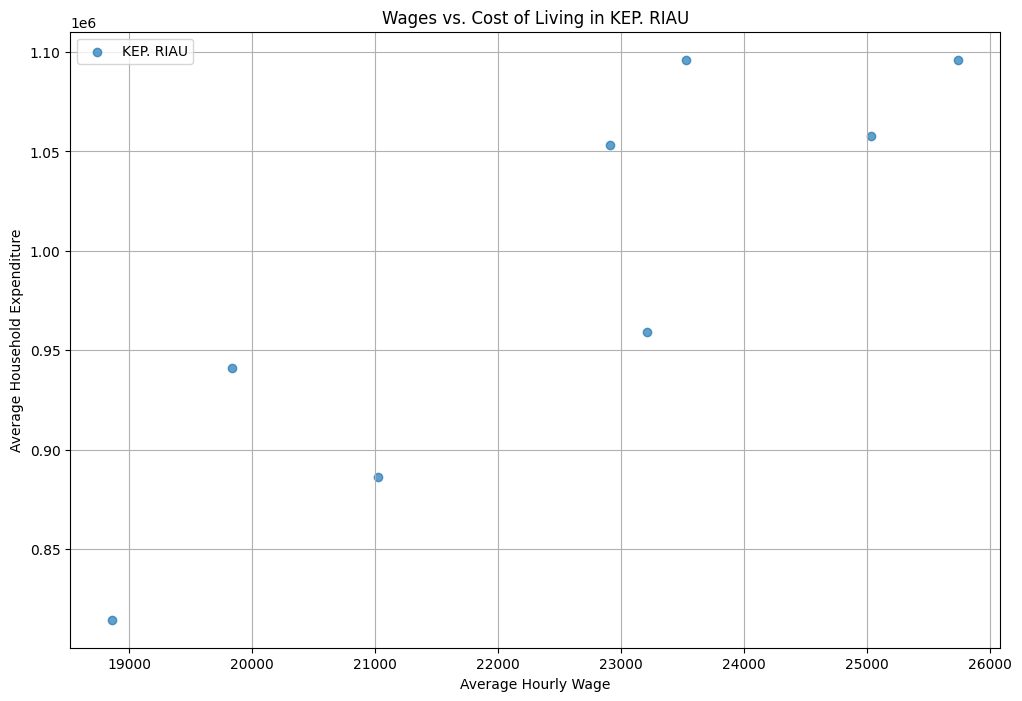

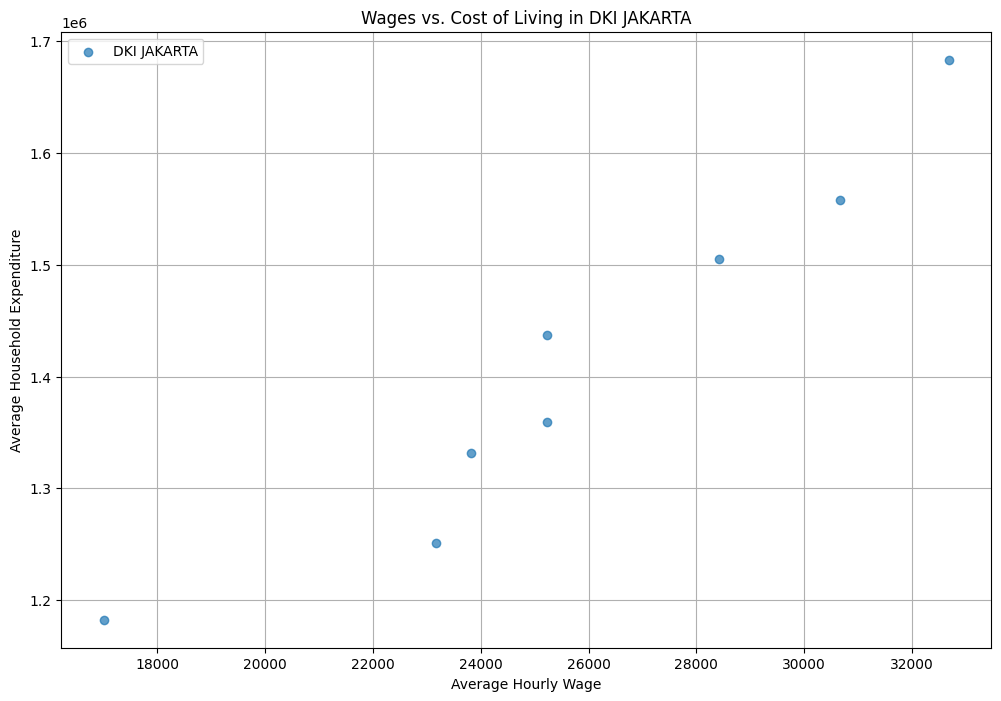

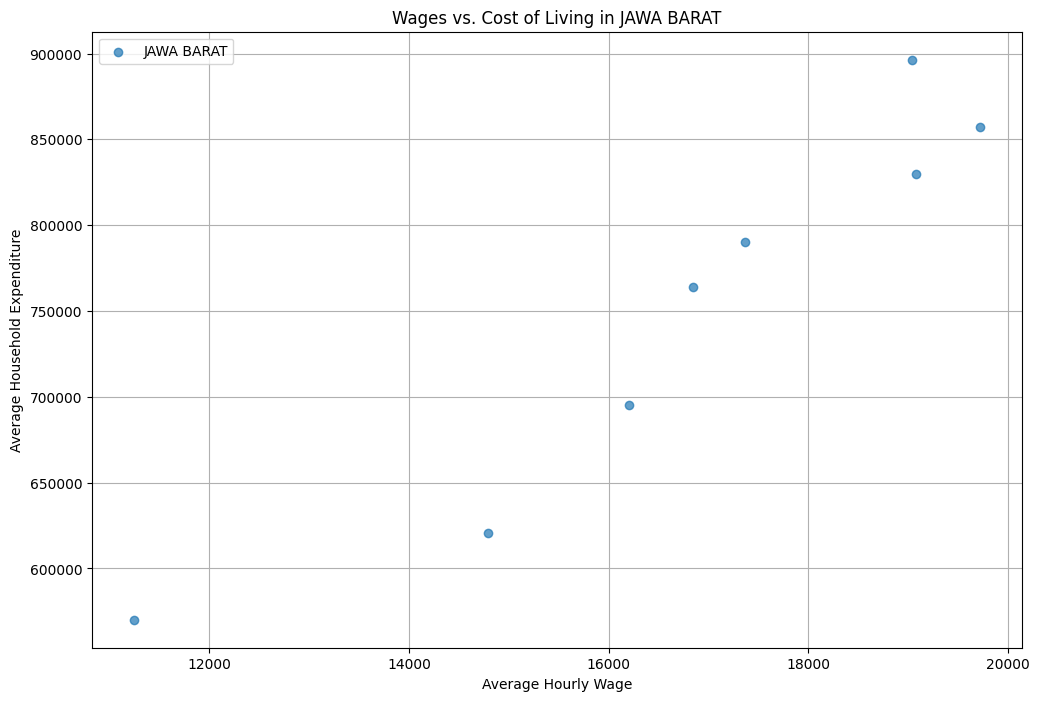

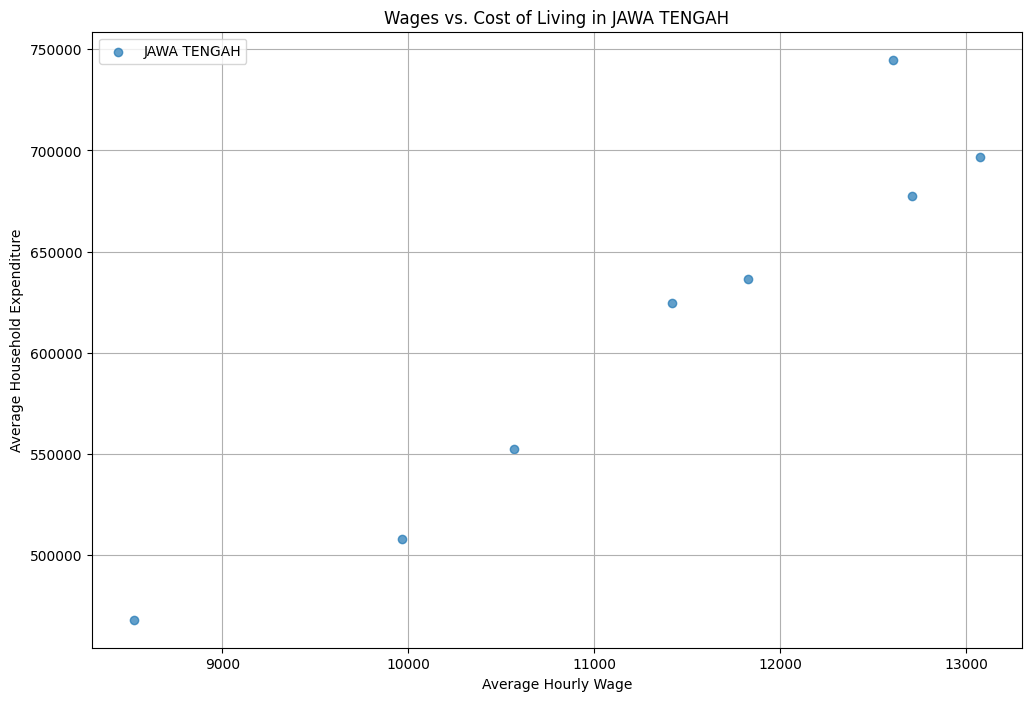

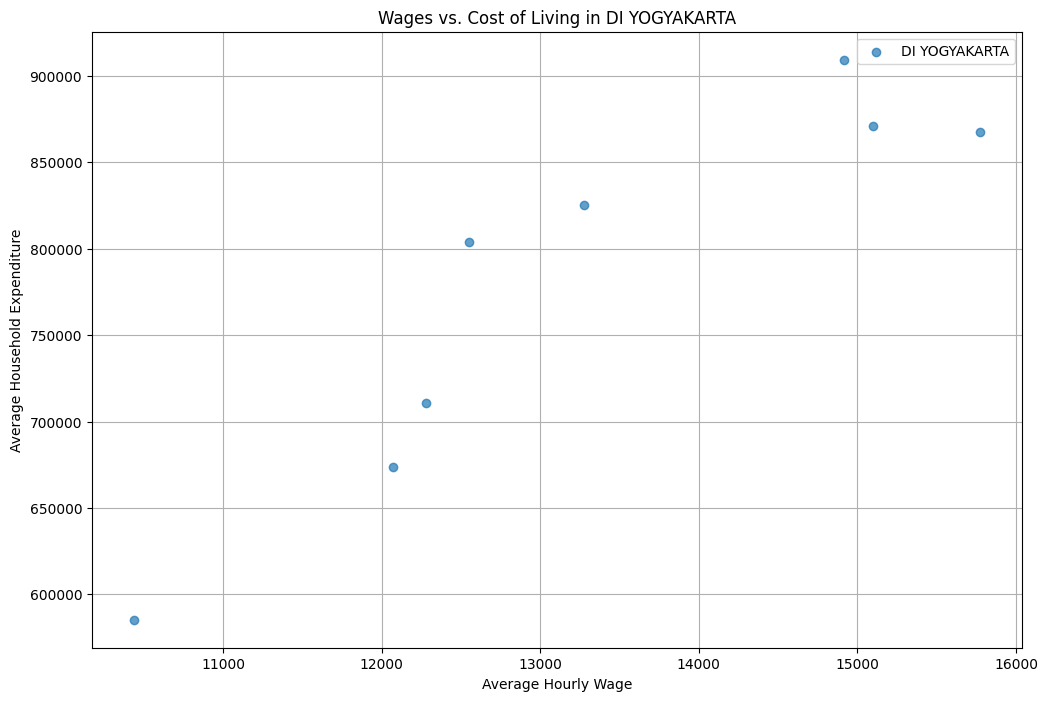

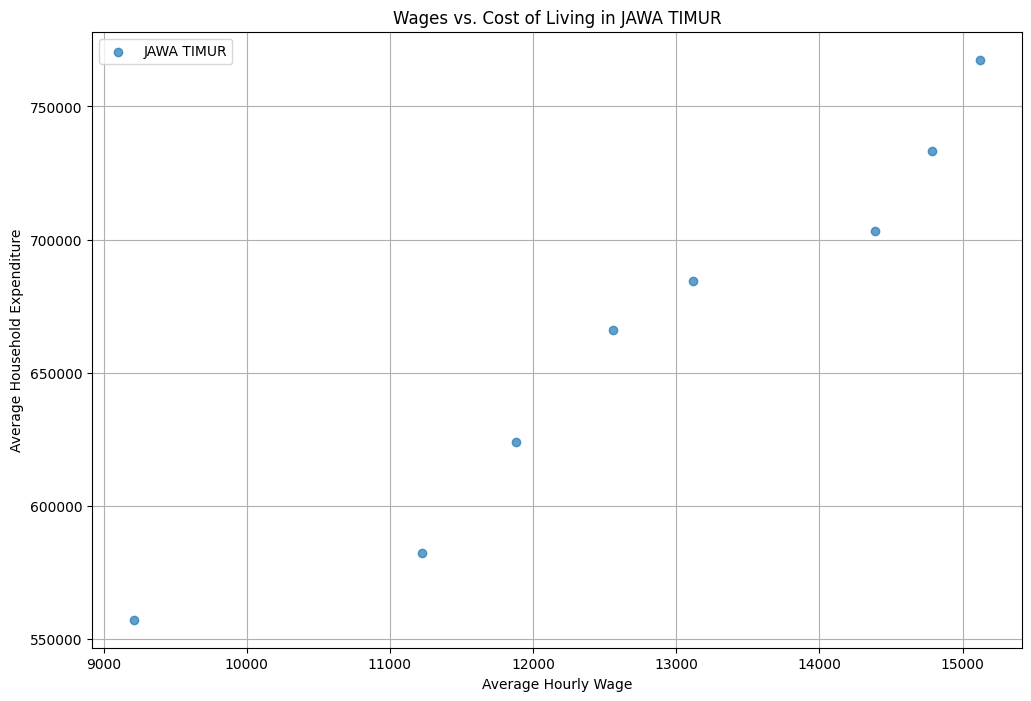

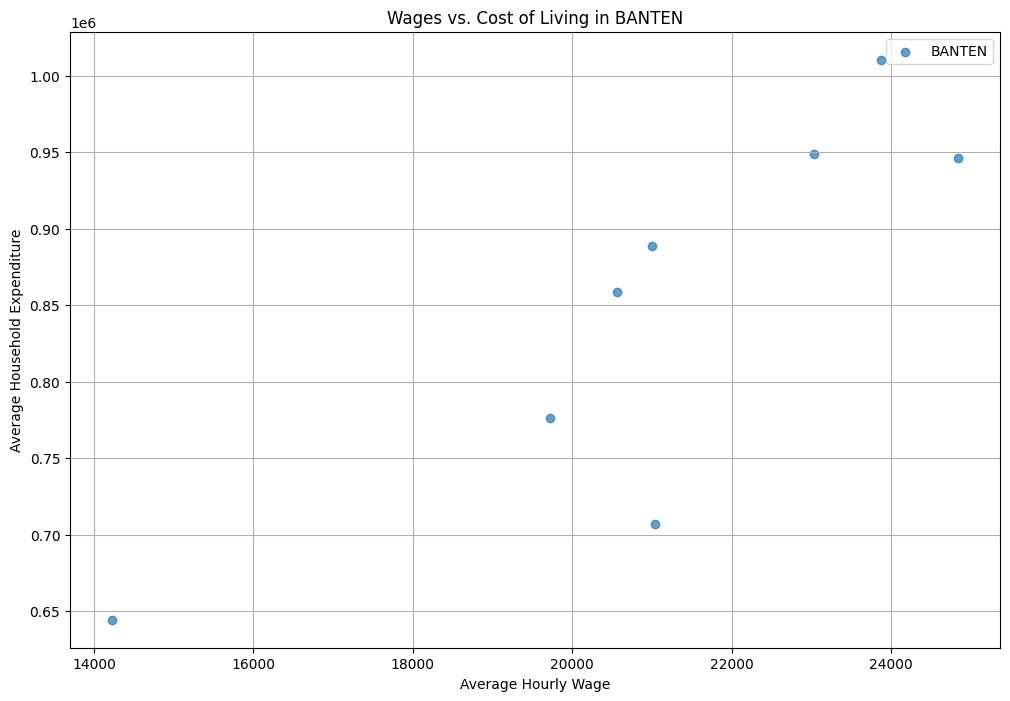

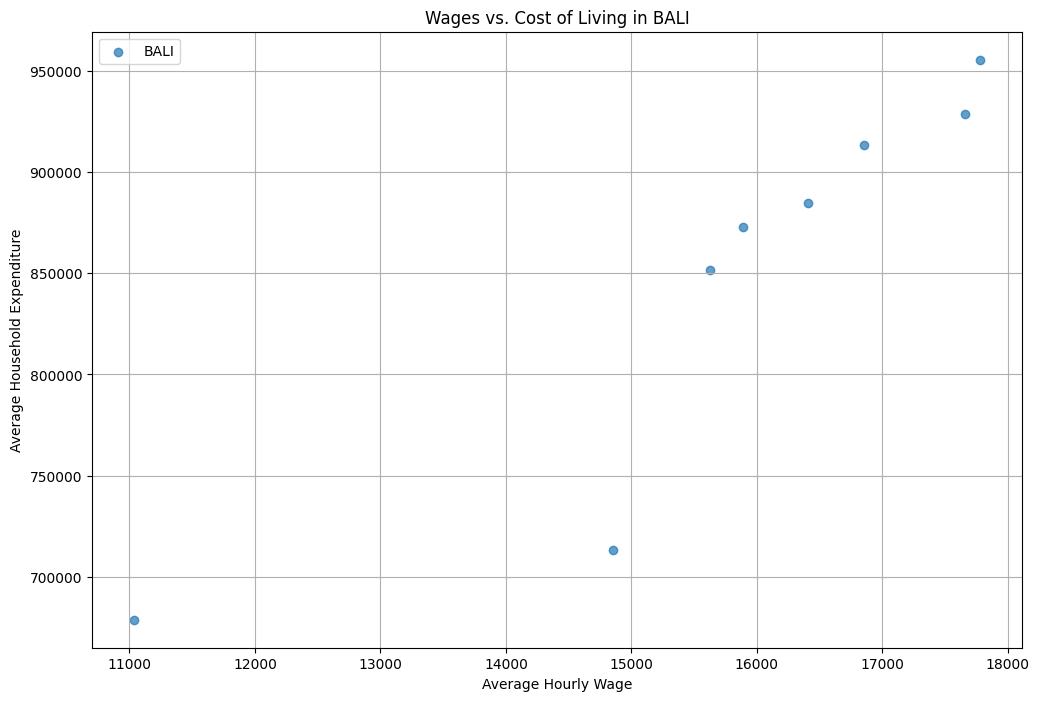

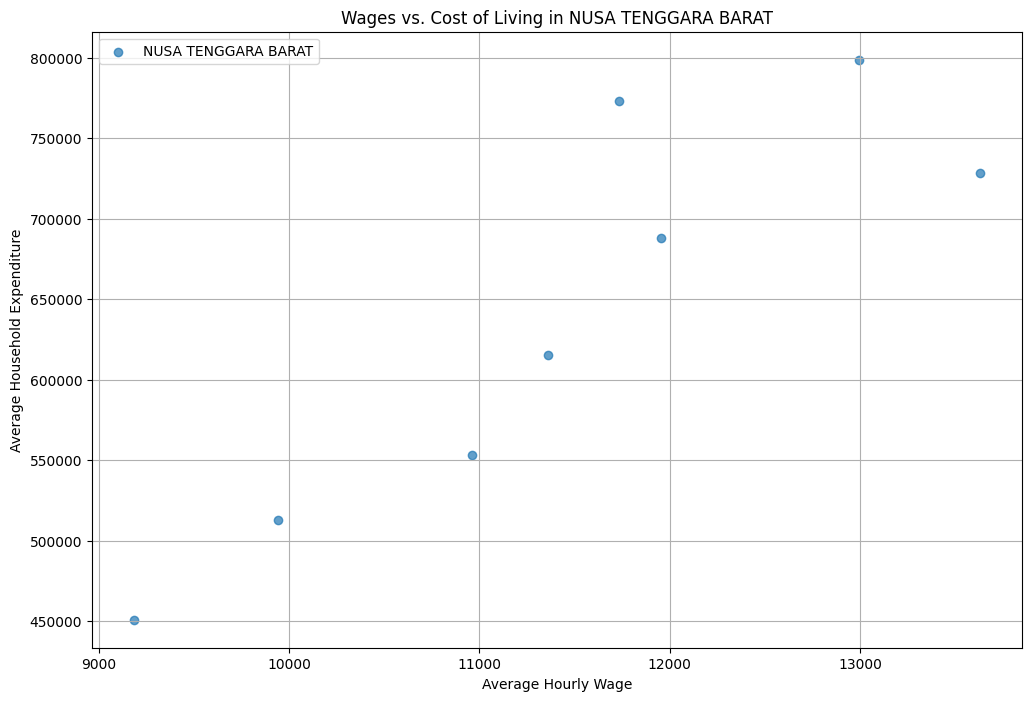

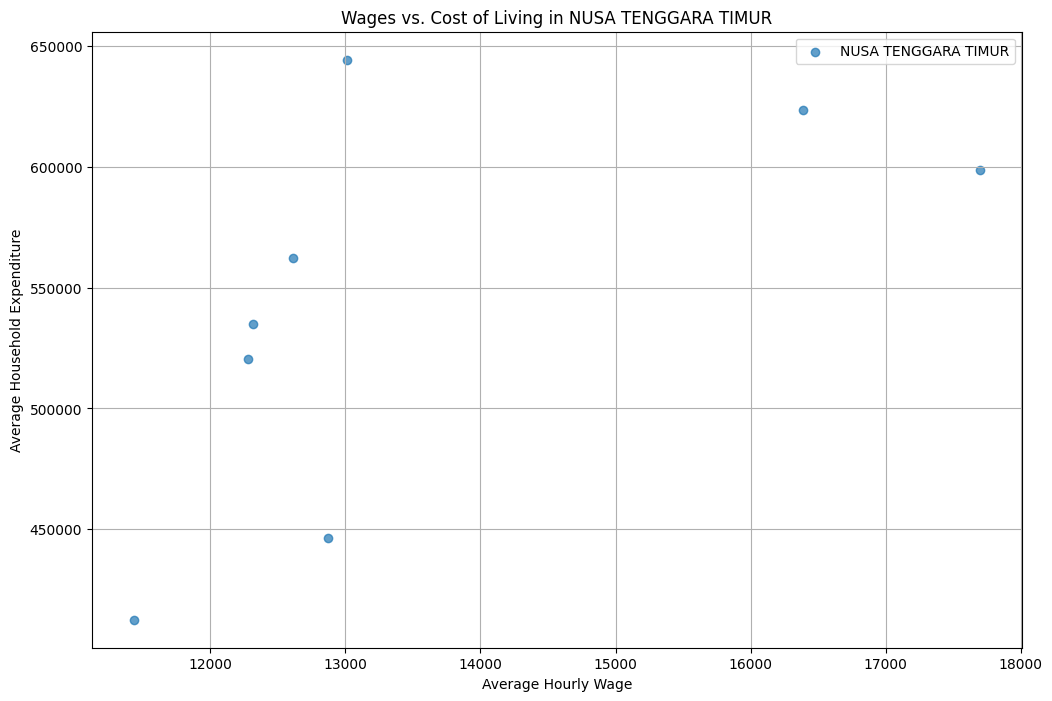

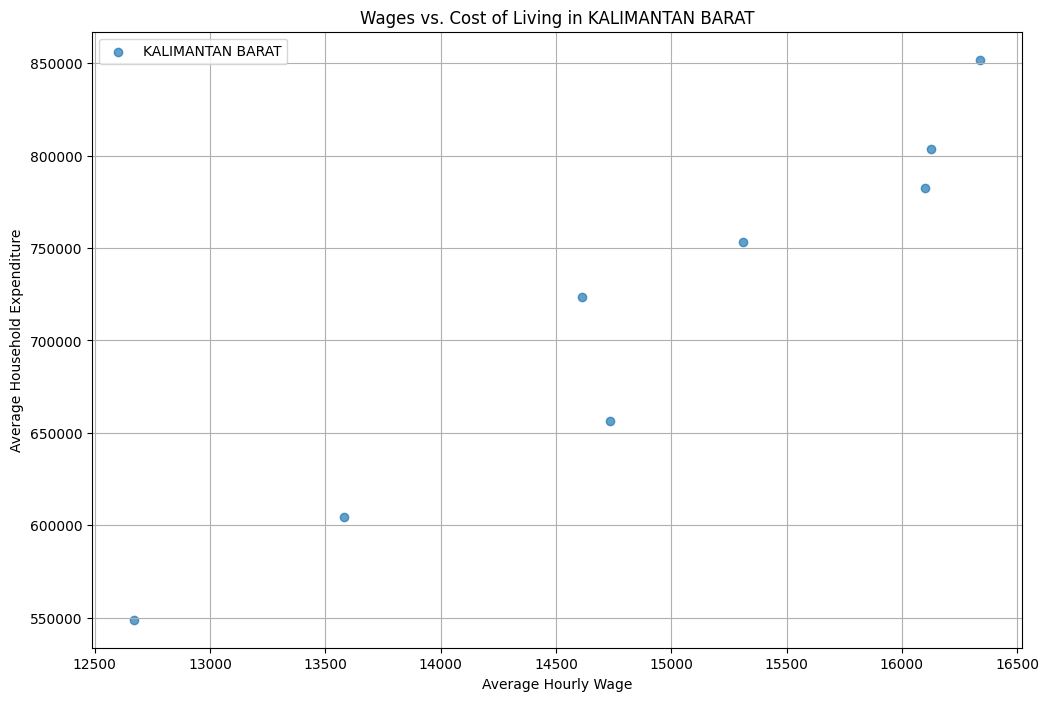

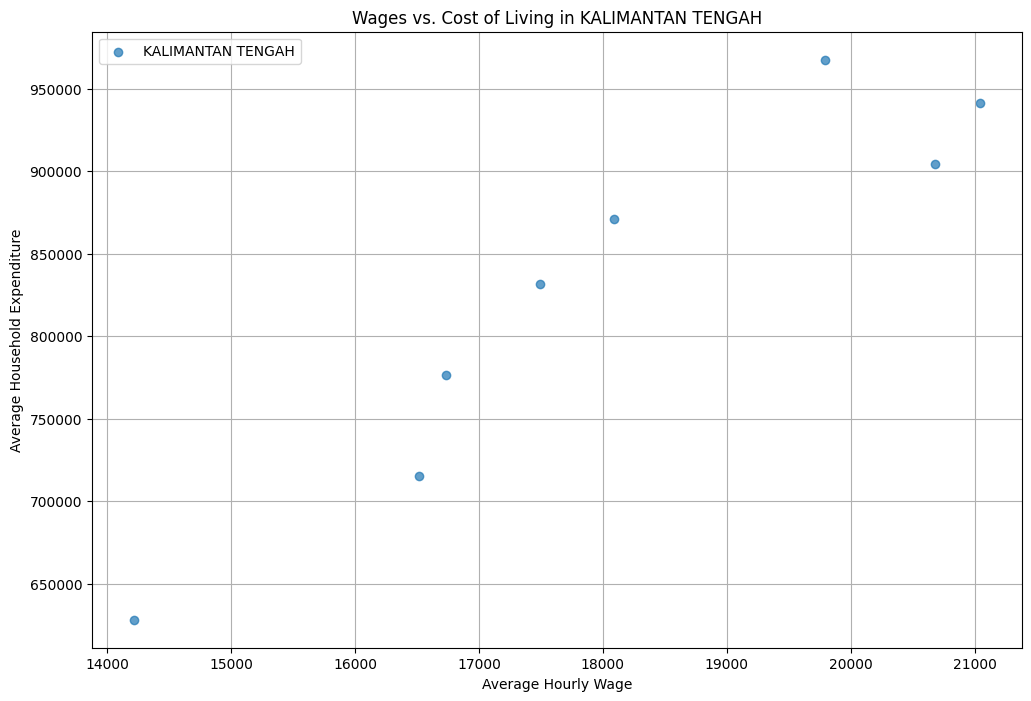

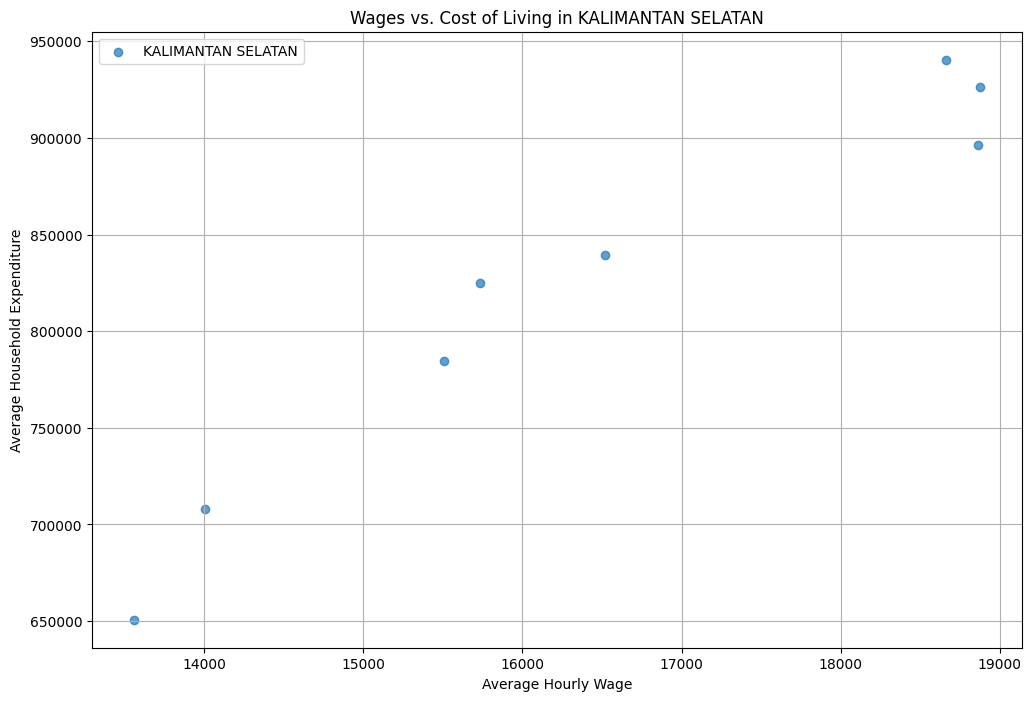

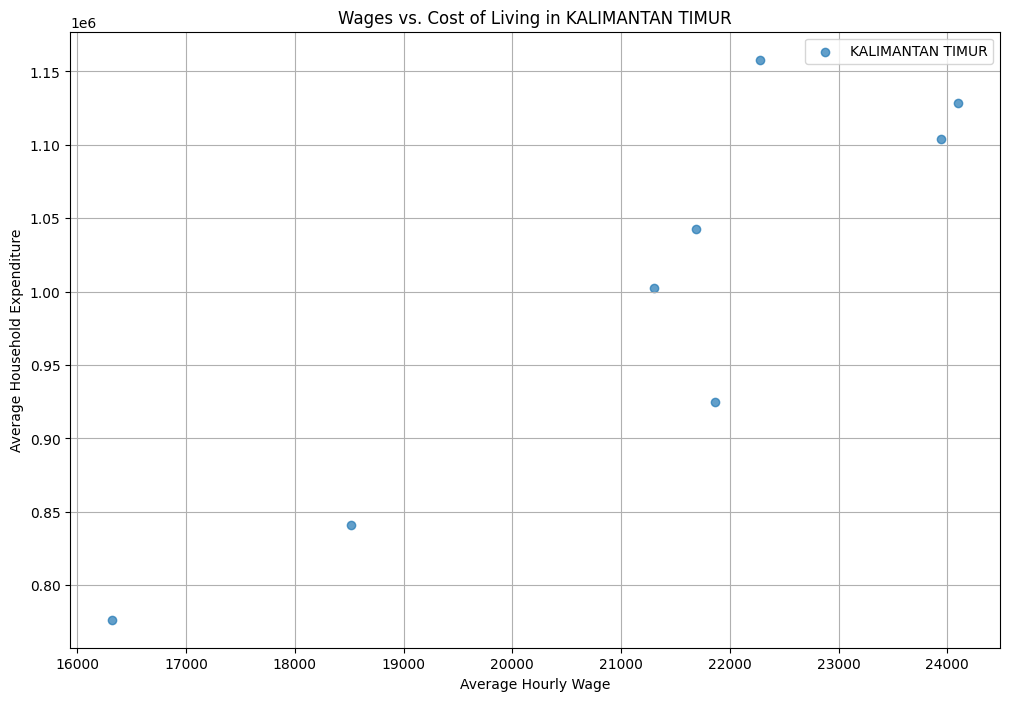

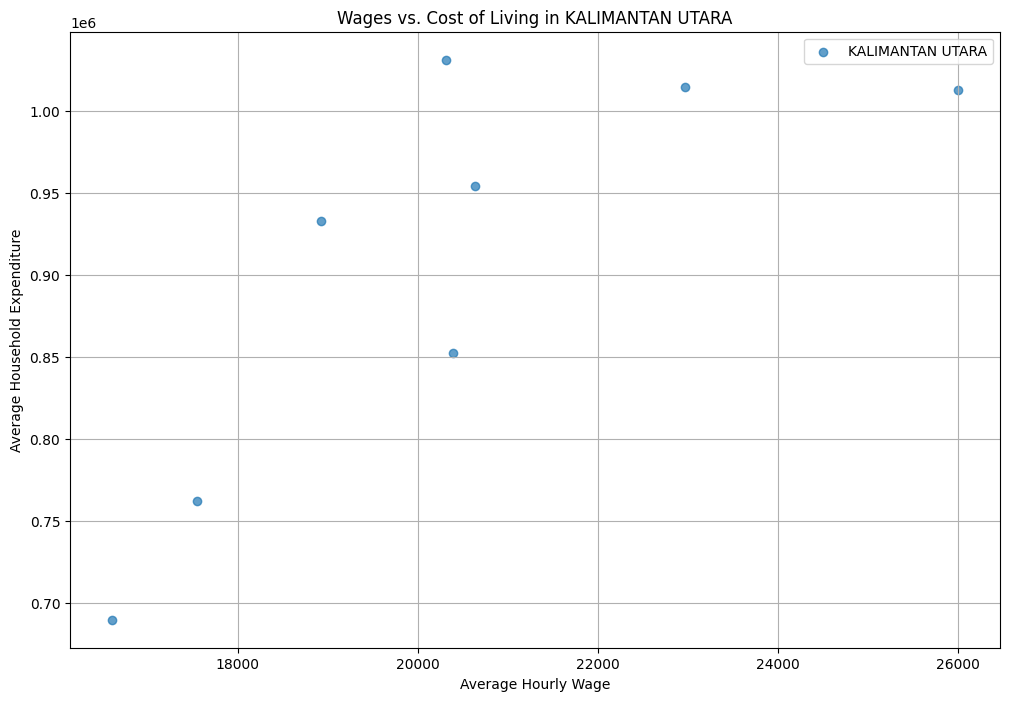

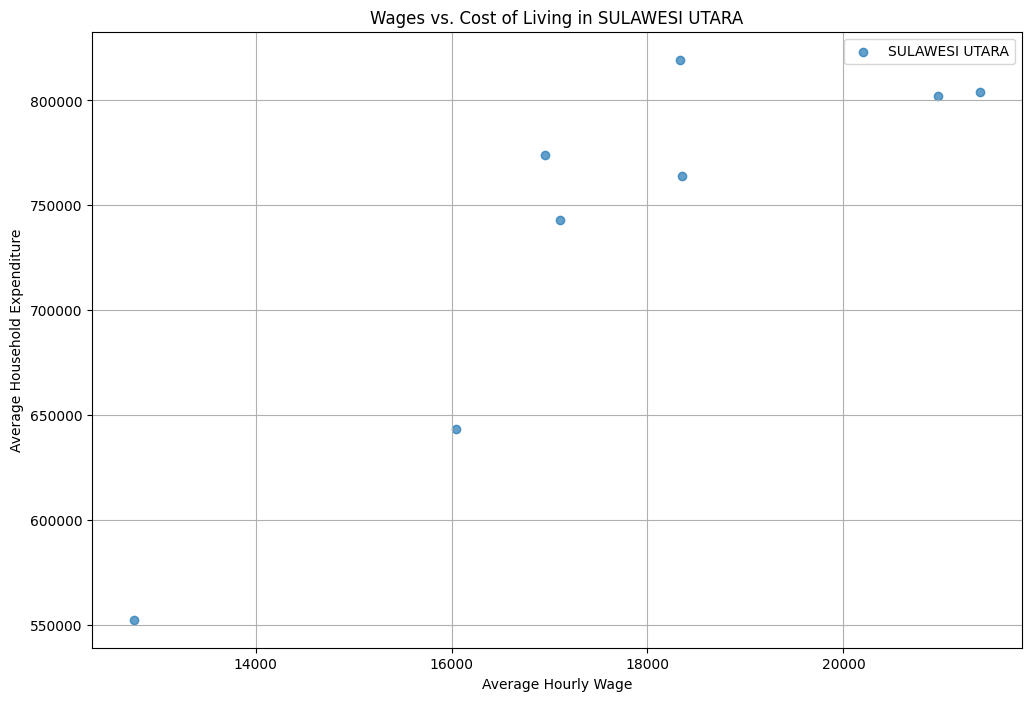

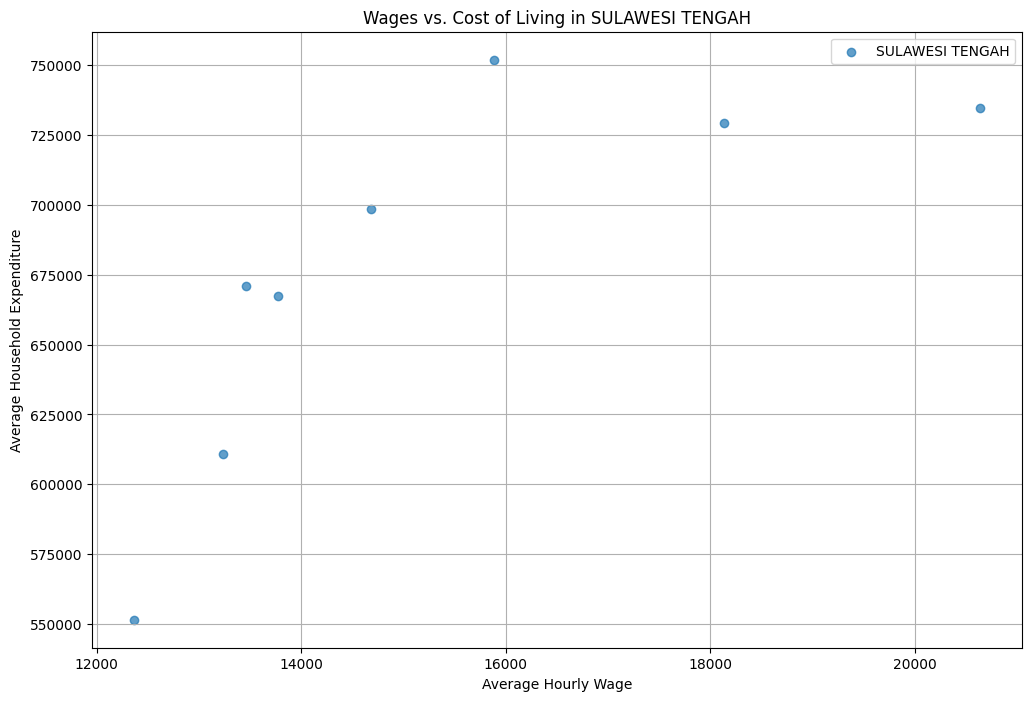

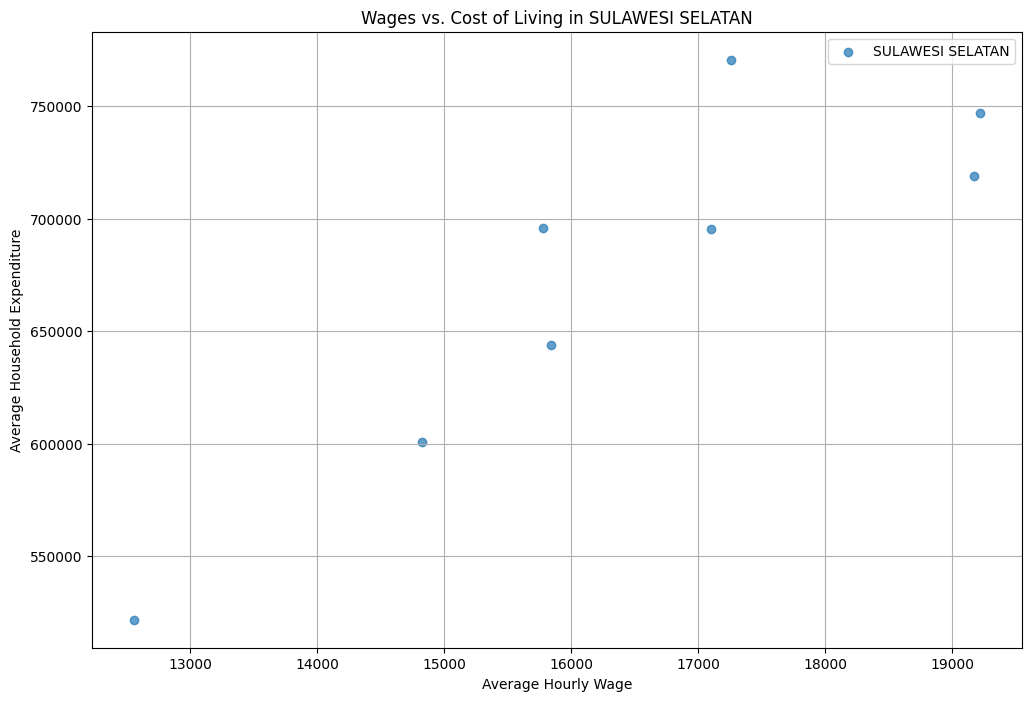

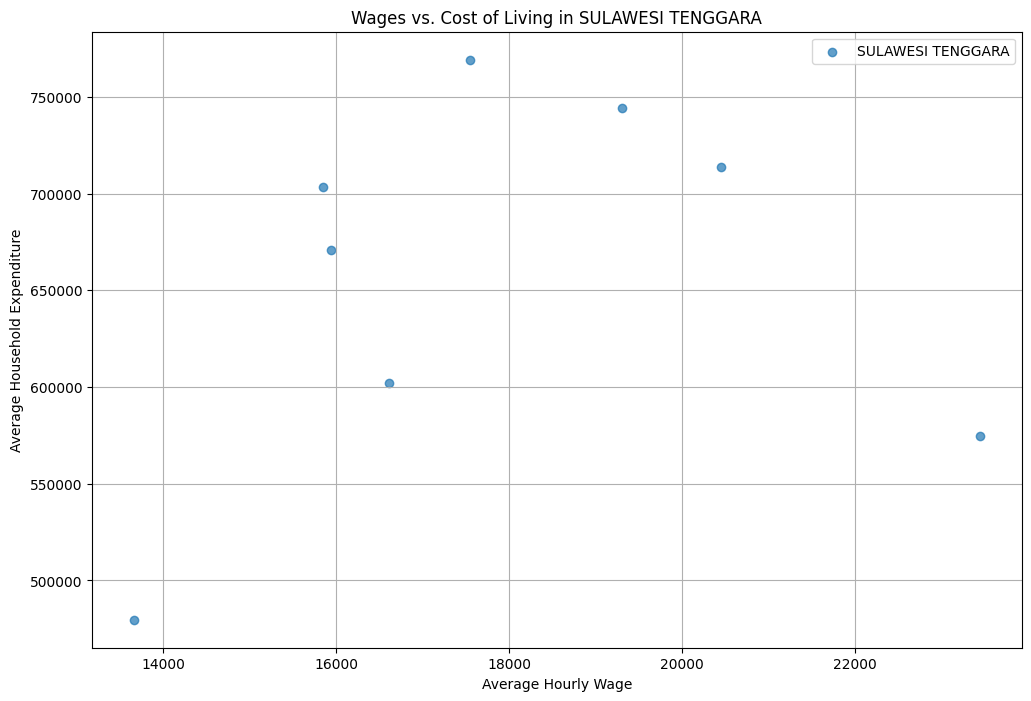

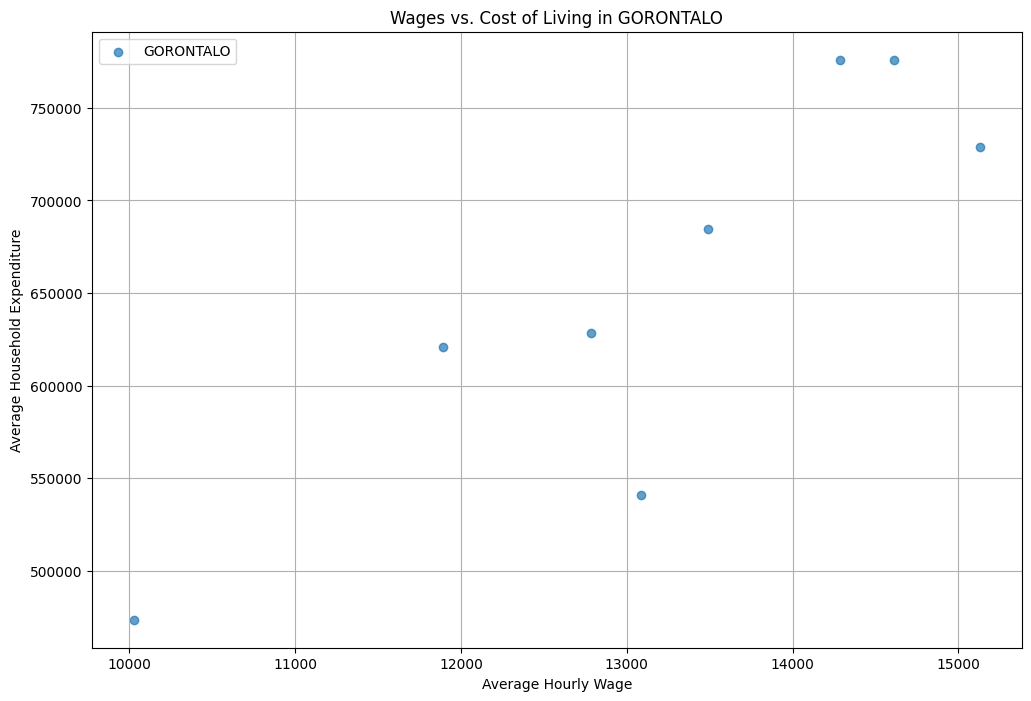

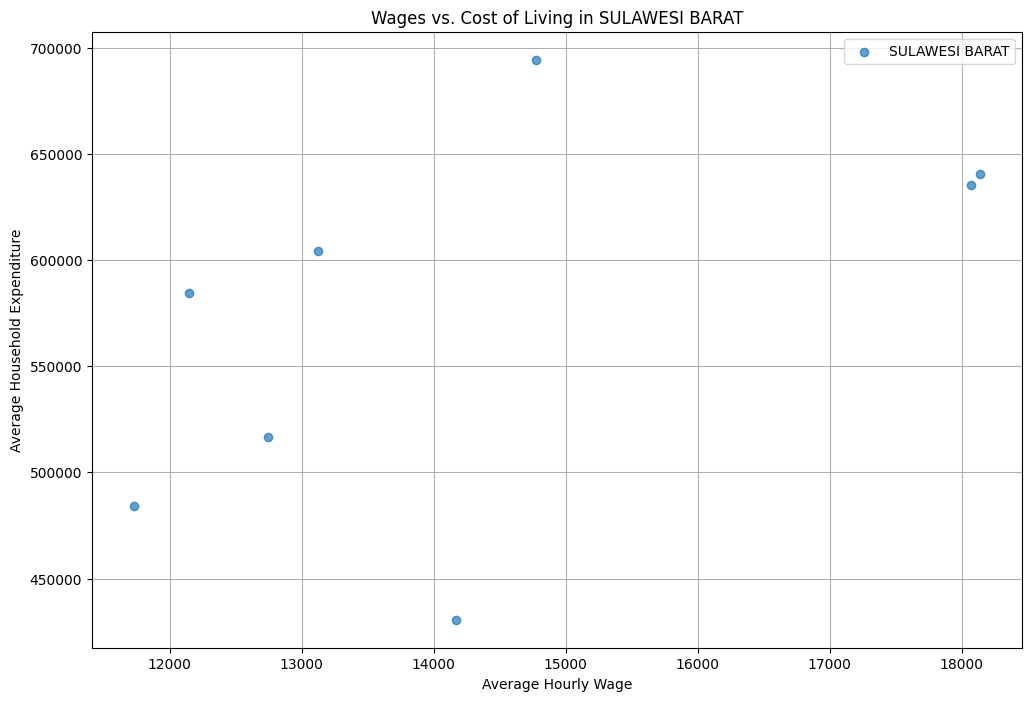

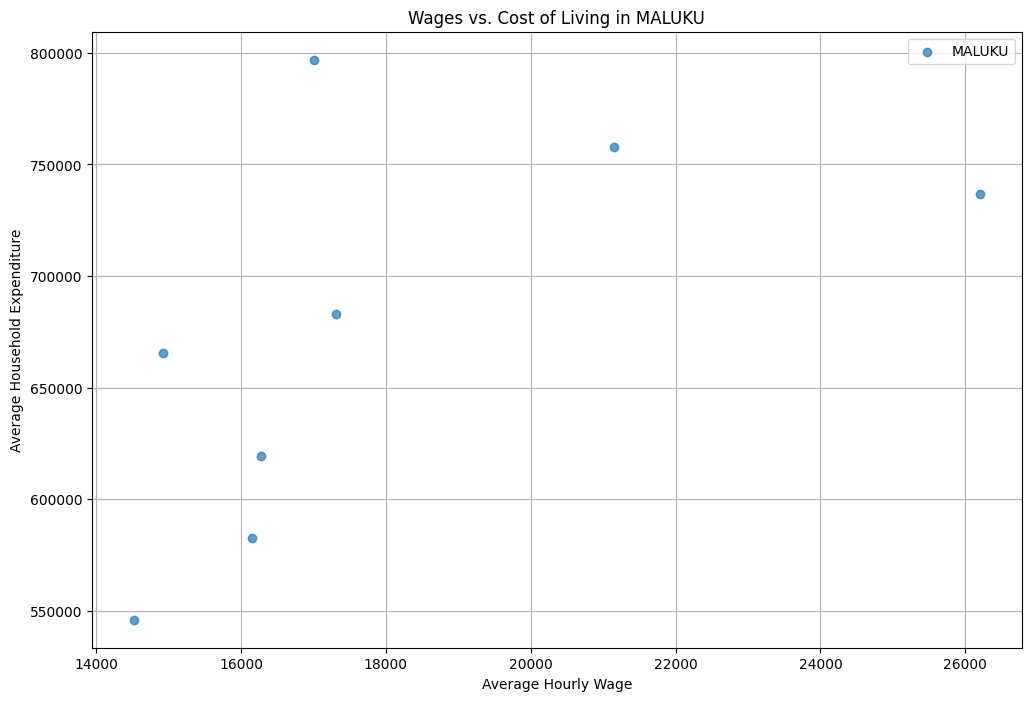

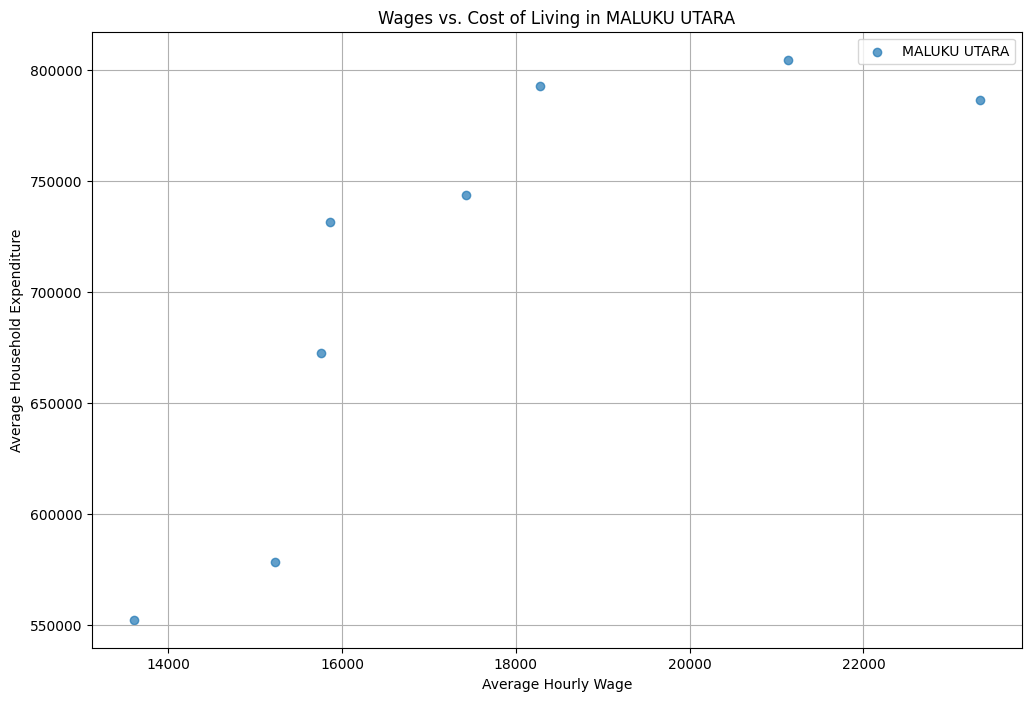

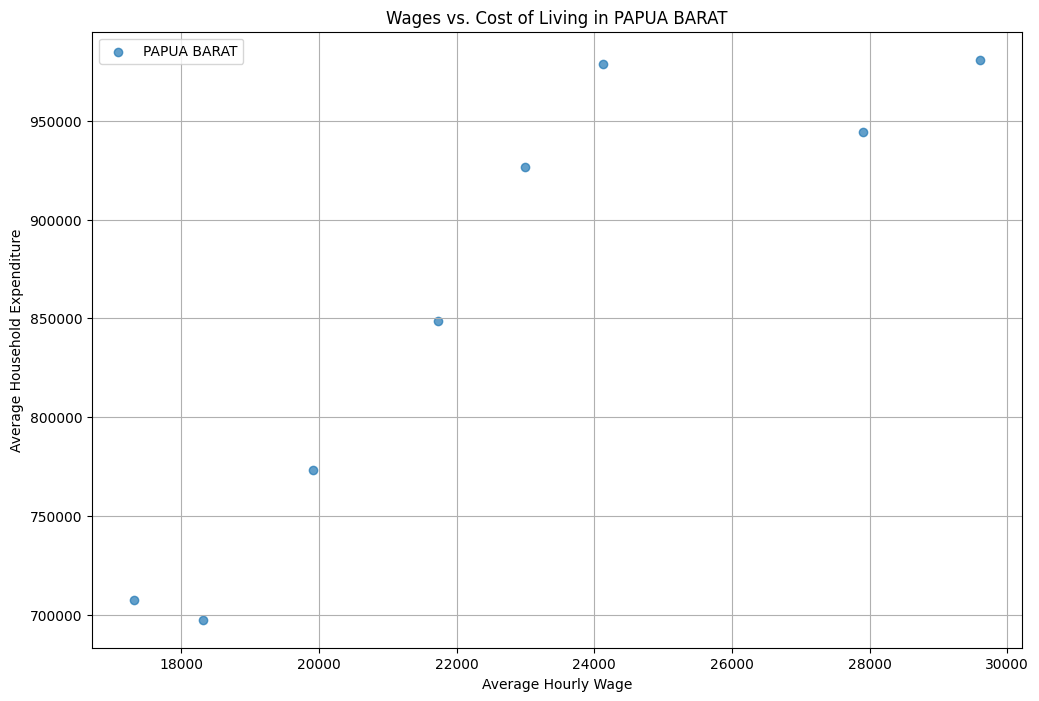

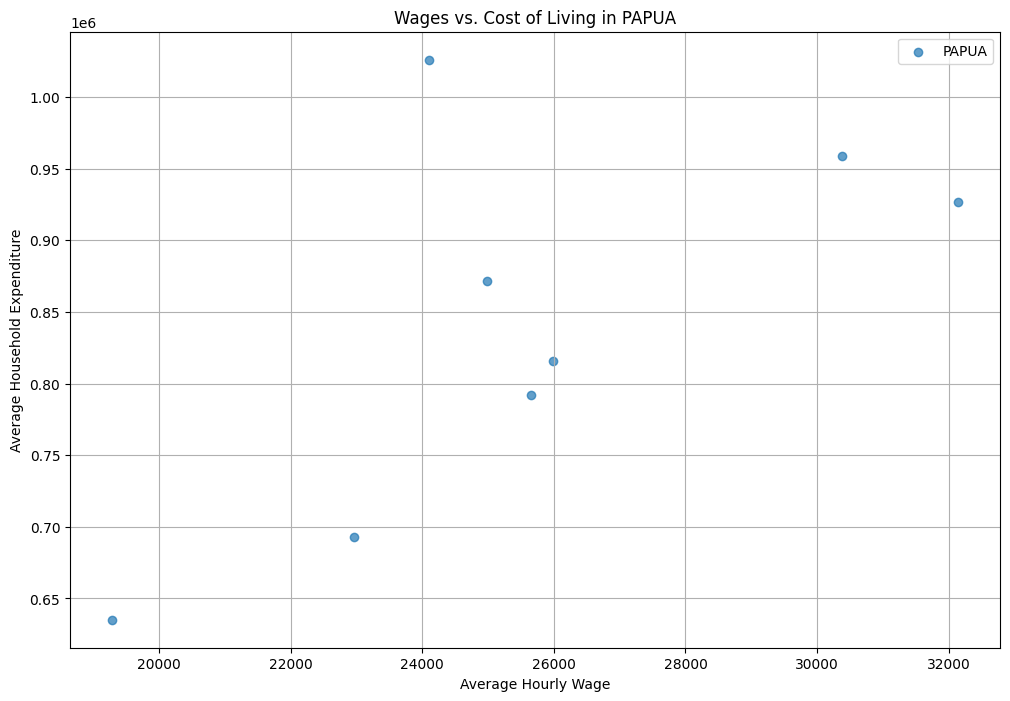

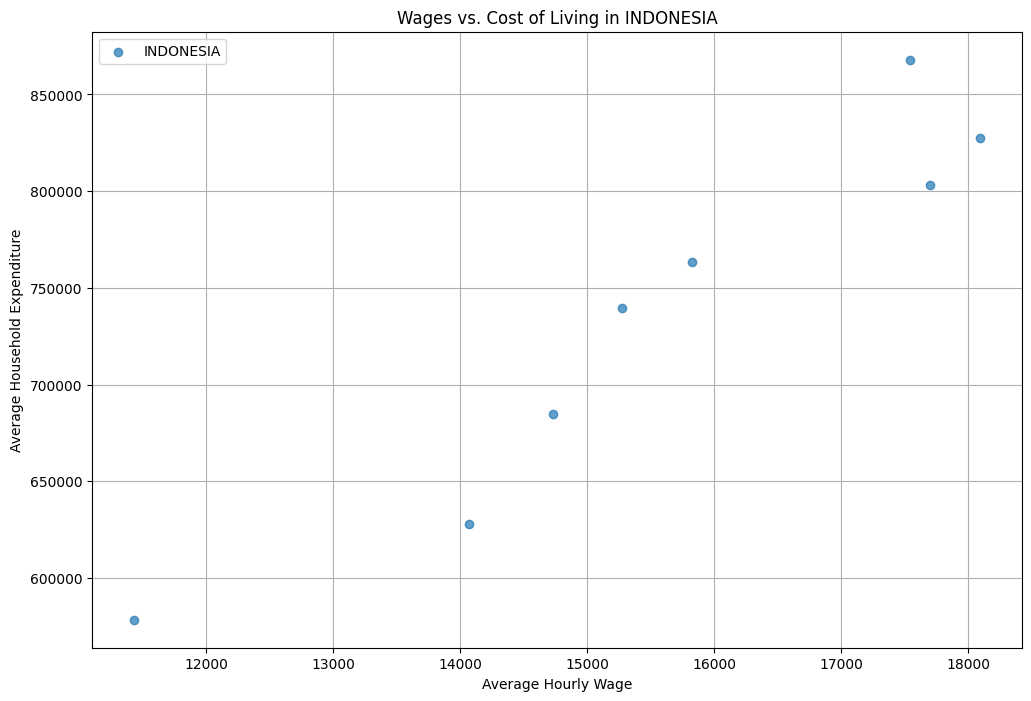

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
upah_df = pd.read_csv('pekerja/upah.df.csv')  # Average Hourly Wage dataset
peng_df = pd.read_csv('pekerja/peng.df.csv')  # Household Expenditure dataset

# Aggregate household expenditure dataset by 'provinsi' and 'tahun'
peng_df = peng_df.groupby(['provinsi', 'tahun'], as_index=False)['peng'].mean()

# Merge datasets on 'provinsi' and 'tahun'
merged_df = pd.merge(upah_df, peng_df, on=['provinsi', 'tahun'], how='inner')

# Ensure 'upah' and 'pengeluaran' are numeric
merged_df['upah'] = pd.to_numeric(merged_df['upah'], errors='coerce')
merged_df['peng'] = pd.to_numeric(merged_df['peng'], errors='coerce')

# Display the merged dataframe to verify
print(merged_df.head())

# Analyze regional disparities by comparing average wage to cost of living
plt.figure(figsize=(12, 8))
plt.scatter(merged_df['upah'], merged_df['peng'], alpha=0.7)
plt.title('Regional Disparities in Wages vs. Cost of Living')
plt.xlabel('Average Hourly Wage')
plt.ylabel('Average Household Expenditure (Cost of Living)')
plt.grid(True)
plt.show()

# Further analysis by province
for provinsi in merged_df['provinsi'].unique():
    prov_data = merged_df[merged_df['provinsi'] == provinsi]
    plt.figure(figsize=(12, 8))
    plt.scatter(prov_data['upah'], prov_data['peng'], label=provinsi, alpha=0.7)
    plt.title(f'Wages vs. Cost of Living in {provinsi}')
    plt.xlabel('Average Hourly Wage')
    plt.ylabel('Average Household Expenditure')
    plt.grid(True)
    plt.legend()
    plt.show()


#Poverty Line Trends Over Time


  provinsi  tahun              daerah        gk
0     ACEH   2013           PERDESAAN  328689.0
1     ACEH   2013  PERDESAANPERKOTAAN       NaN
2     ACEH   2013           PERKOTAAN  366739.0
3     ACEH   2014           PERDESAAN  359718.0
4     ACEH   2014  PERDESAANPERKOTAAN       NaN


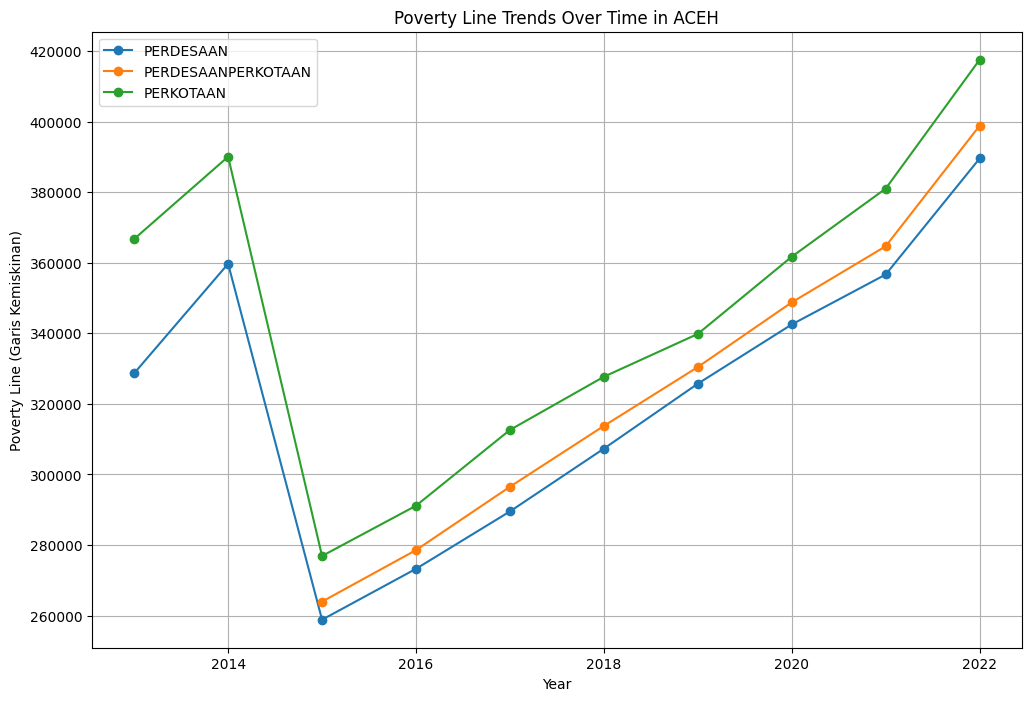

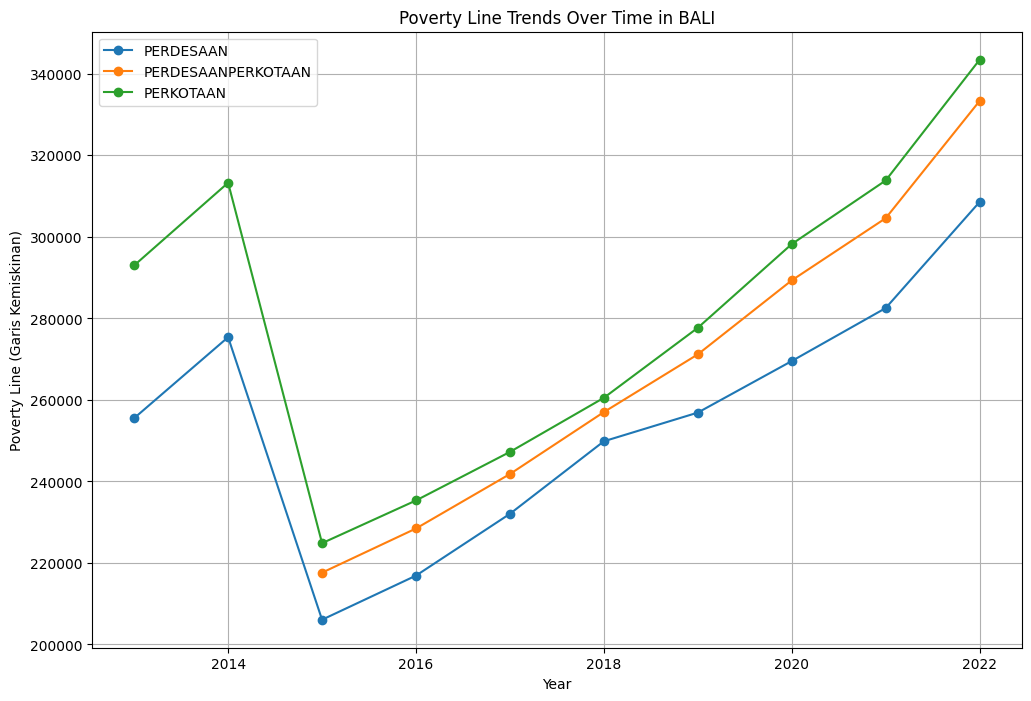

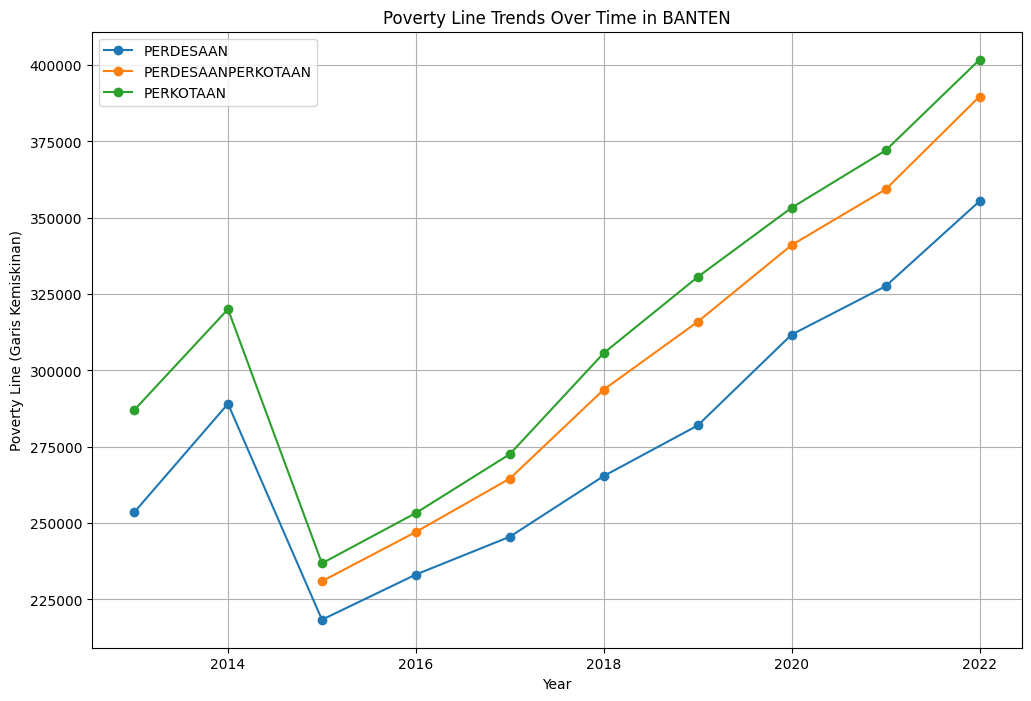

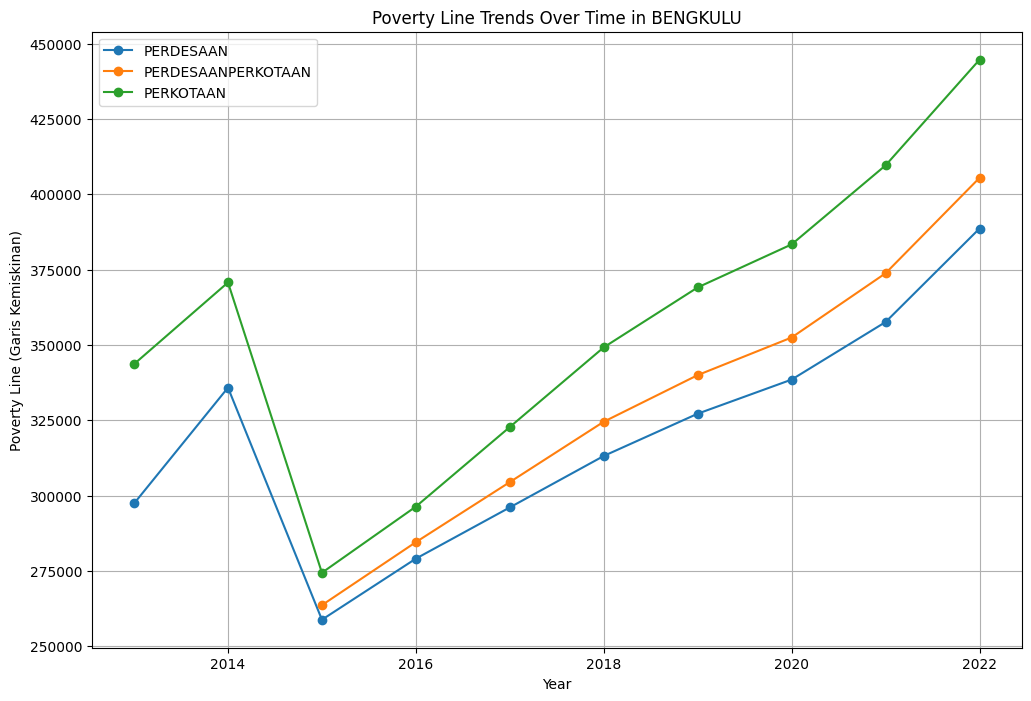

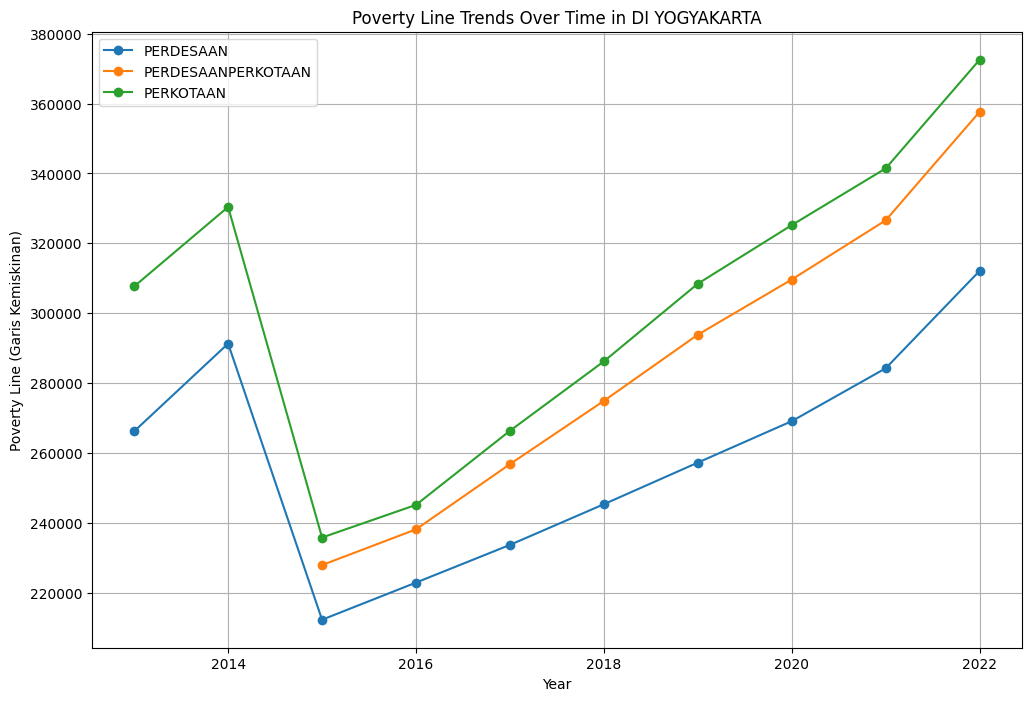

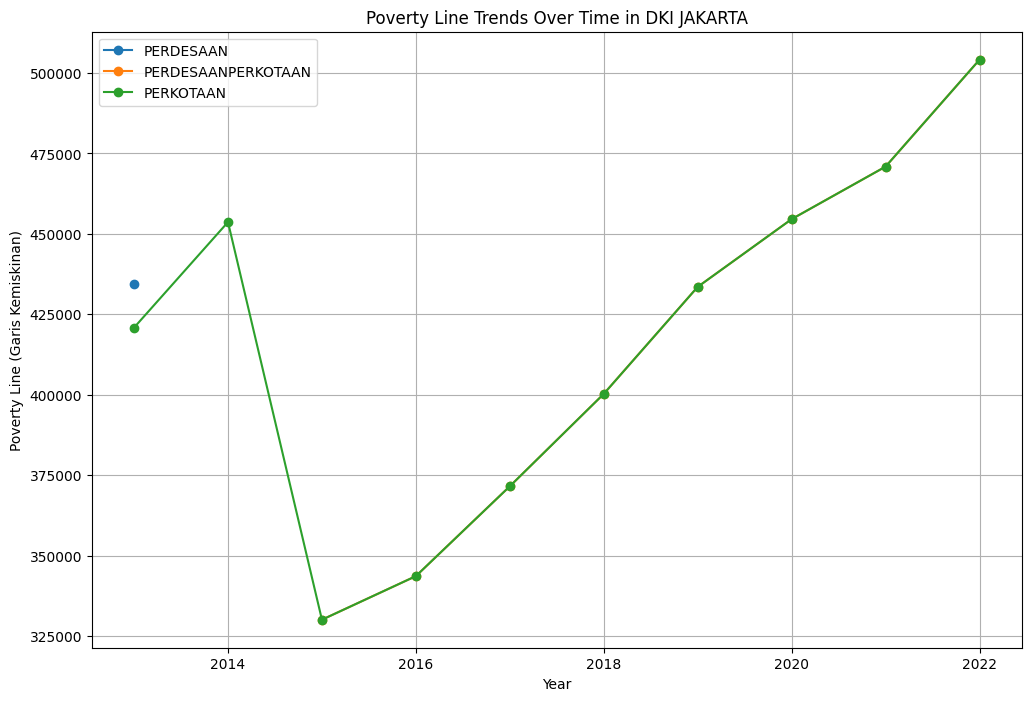

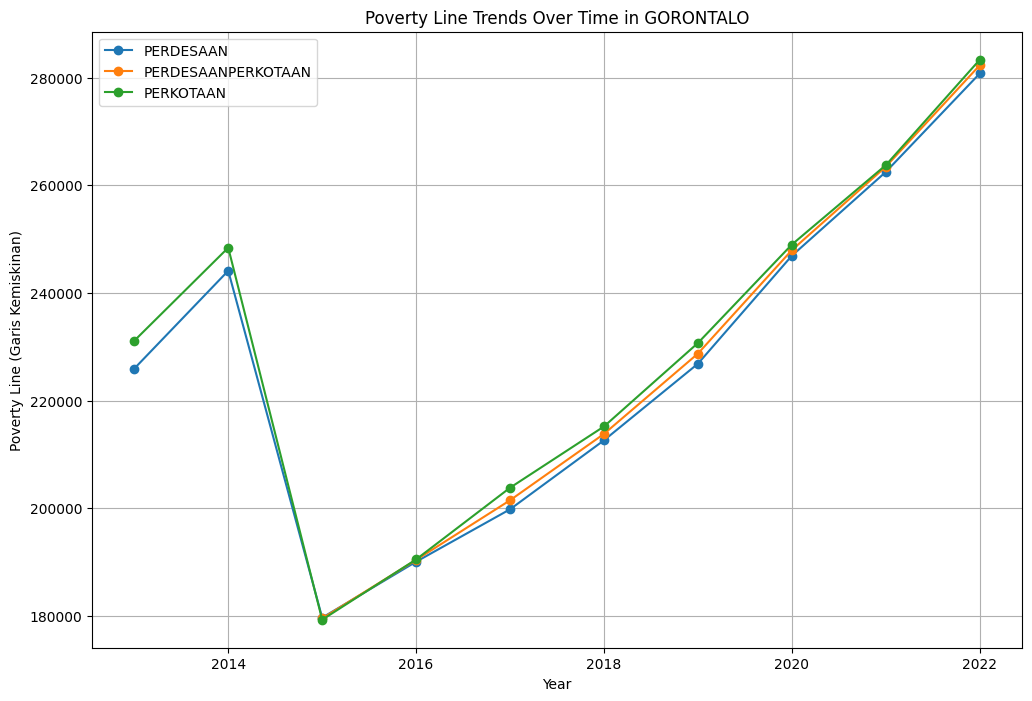

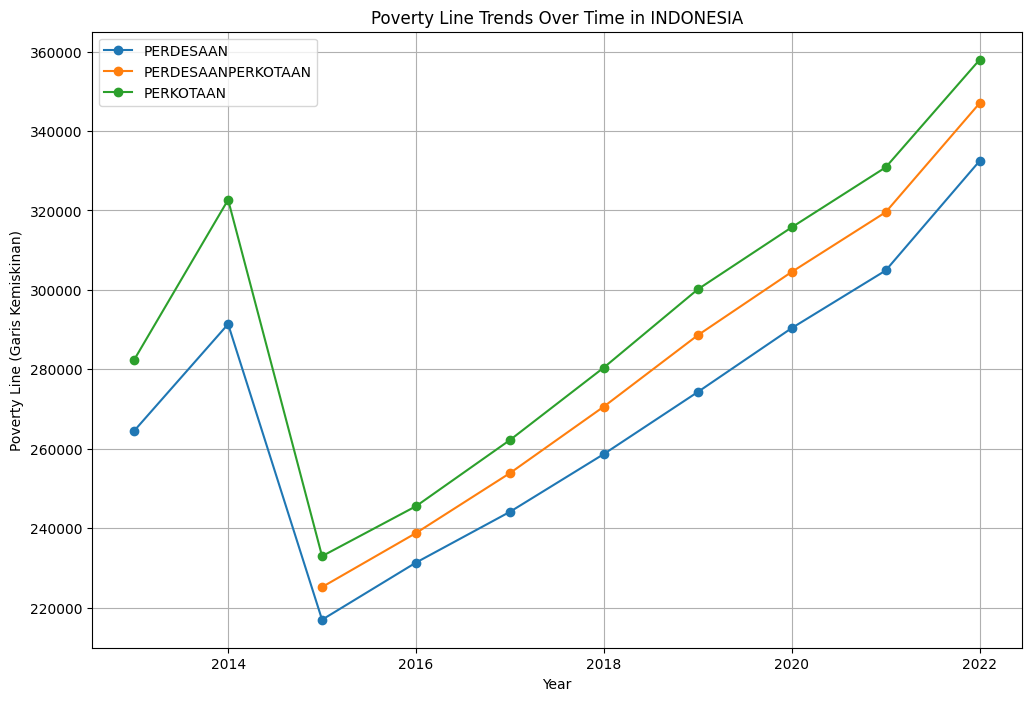

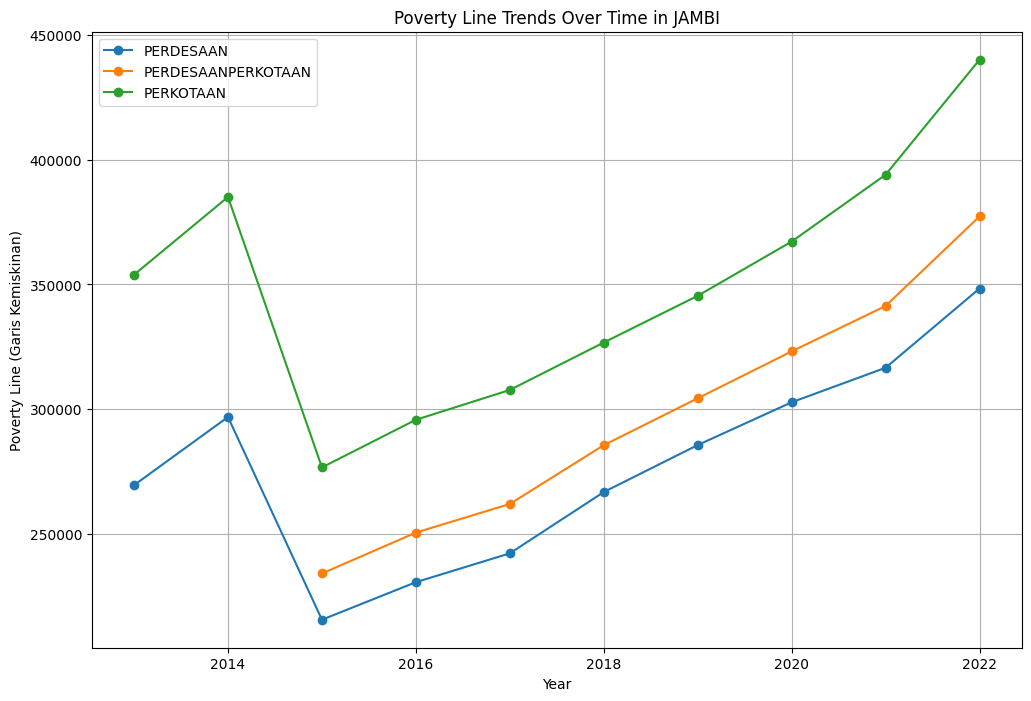

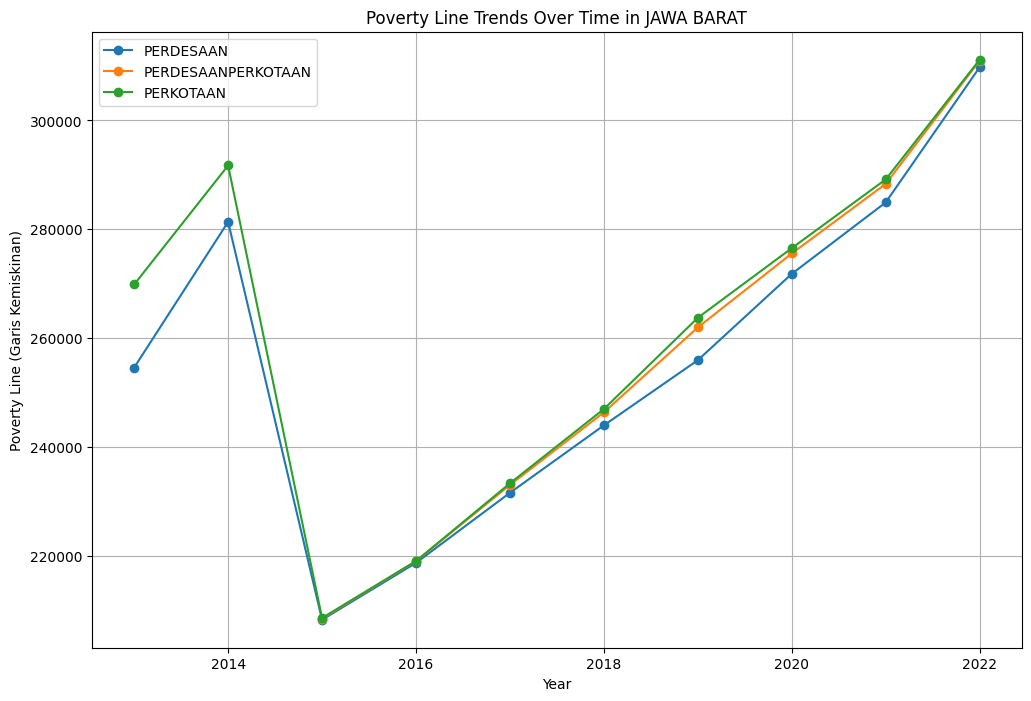

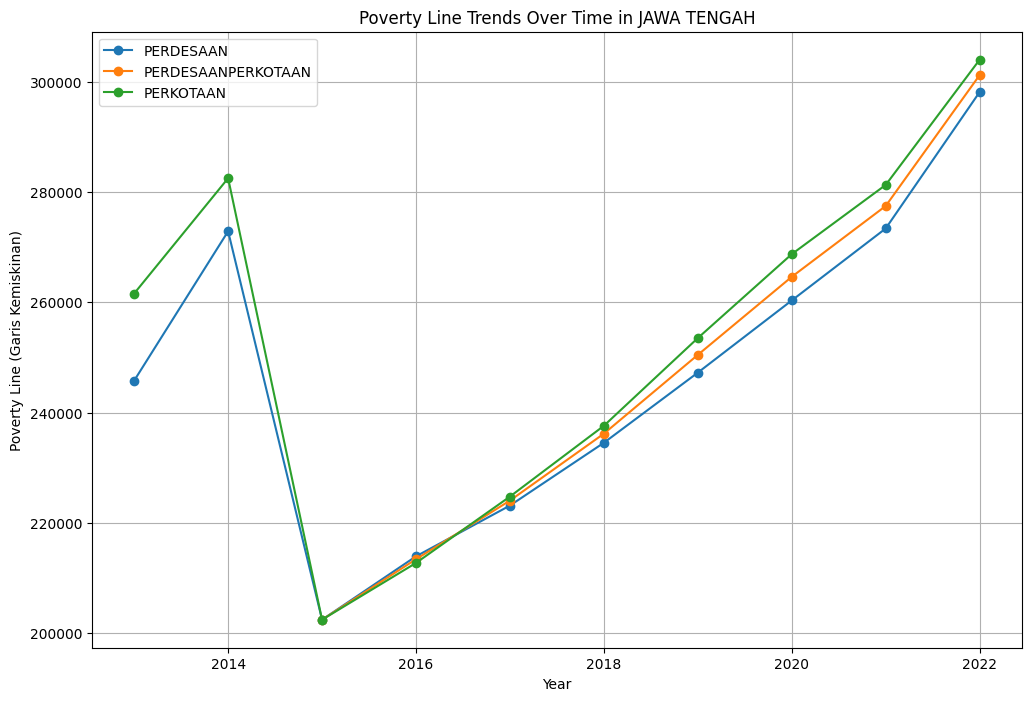

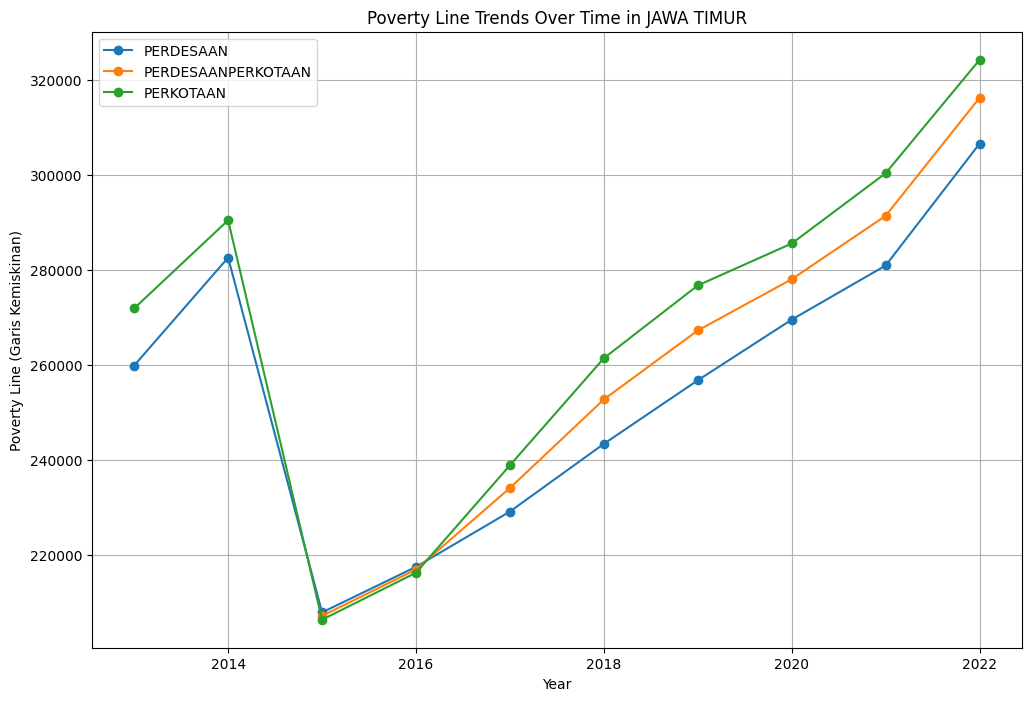

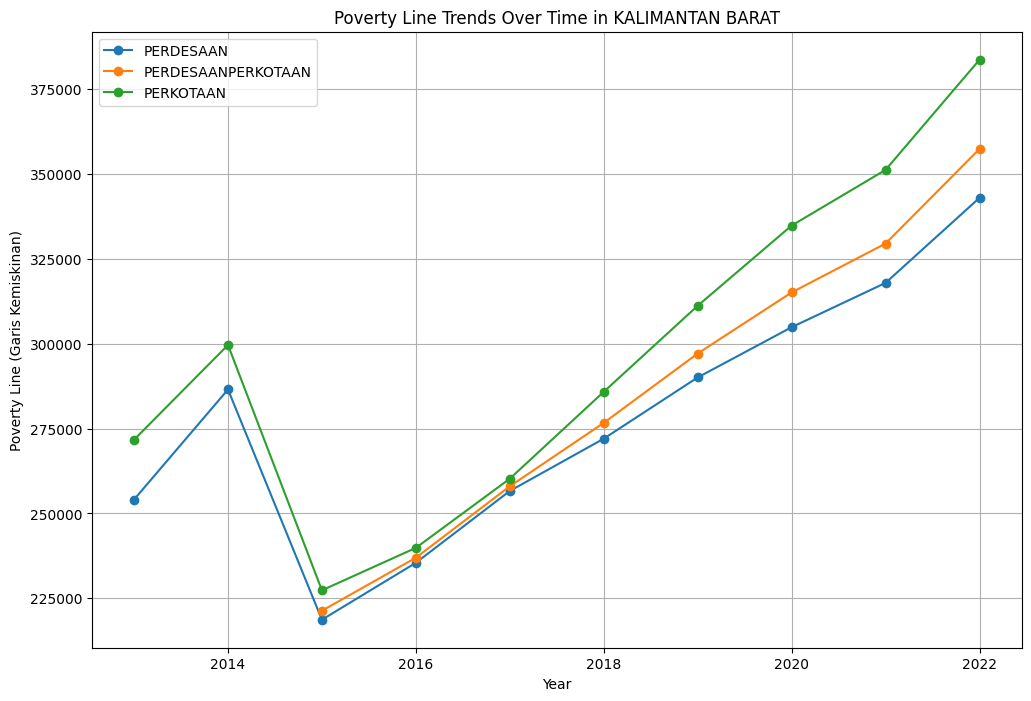

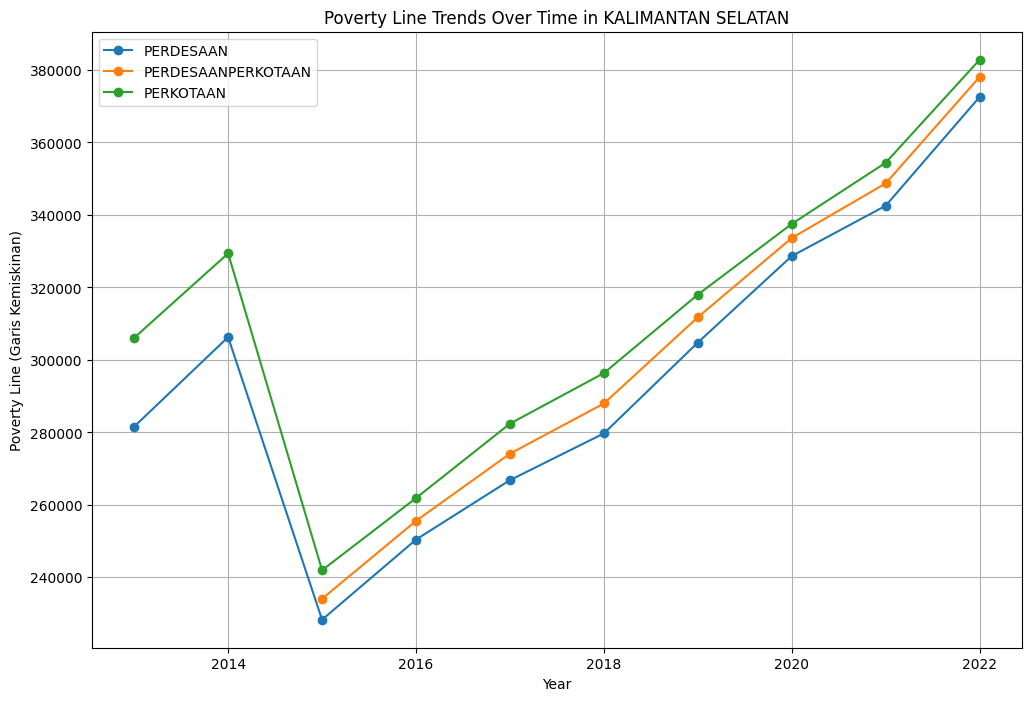

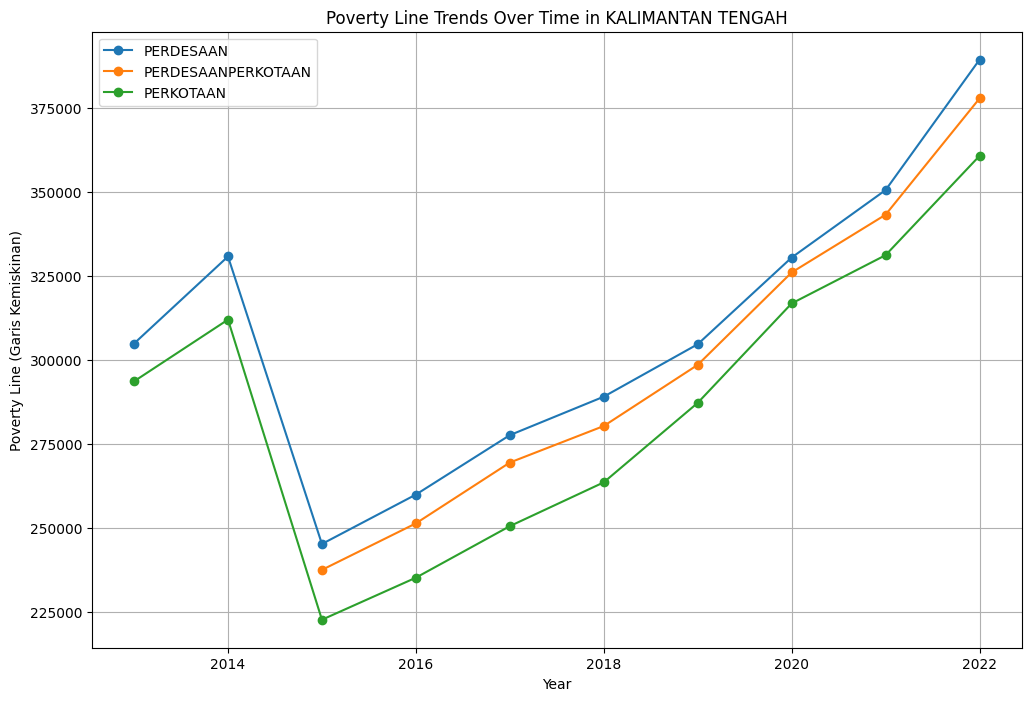

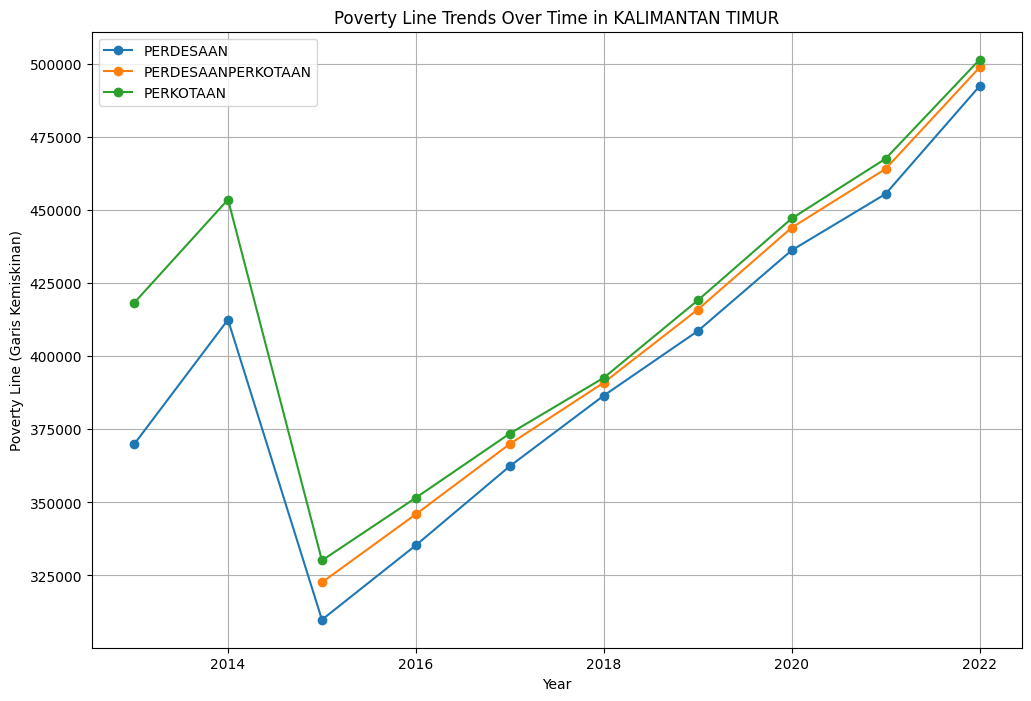

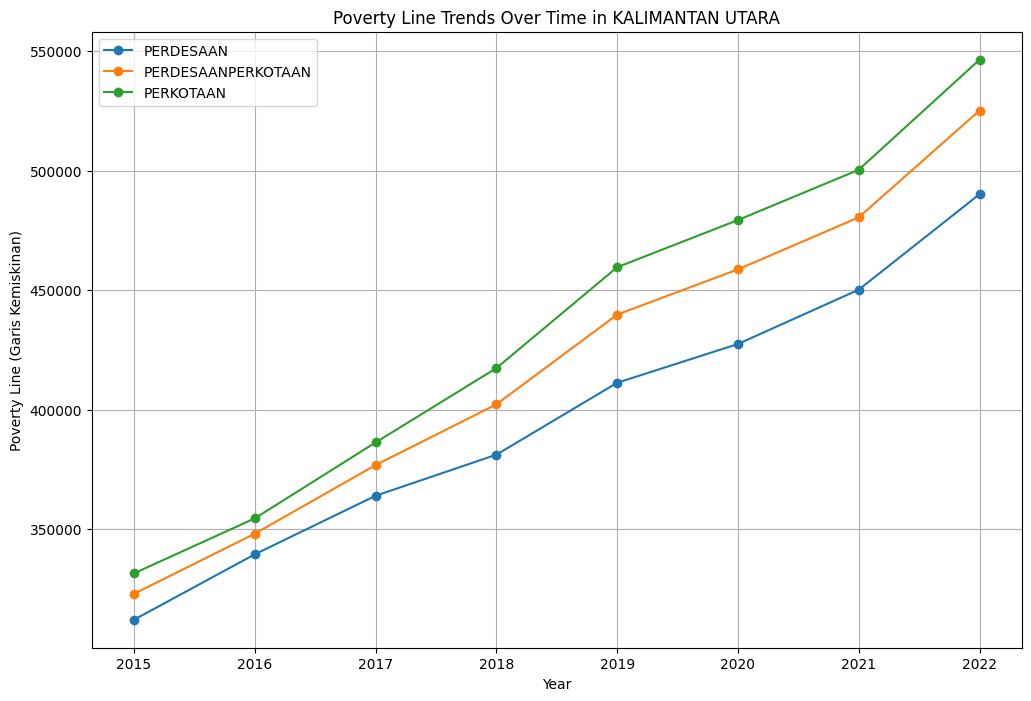

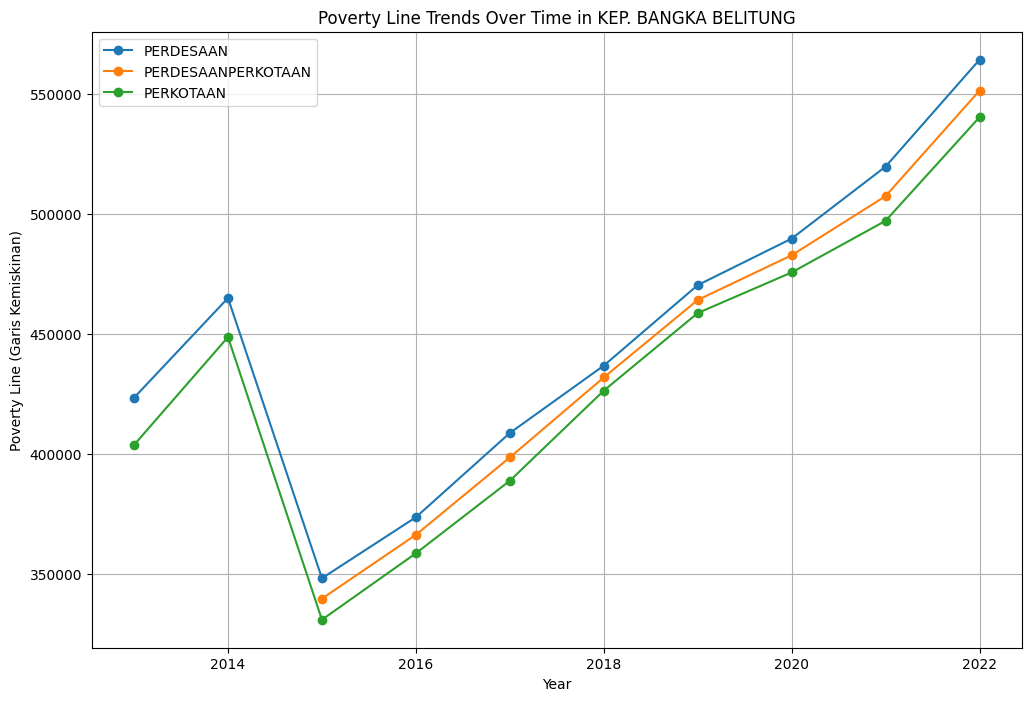

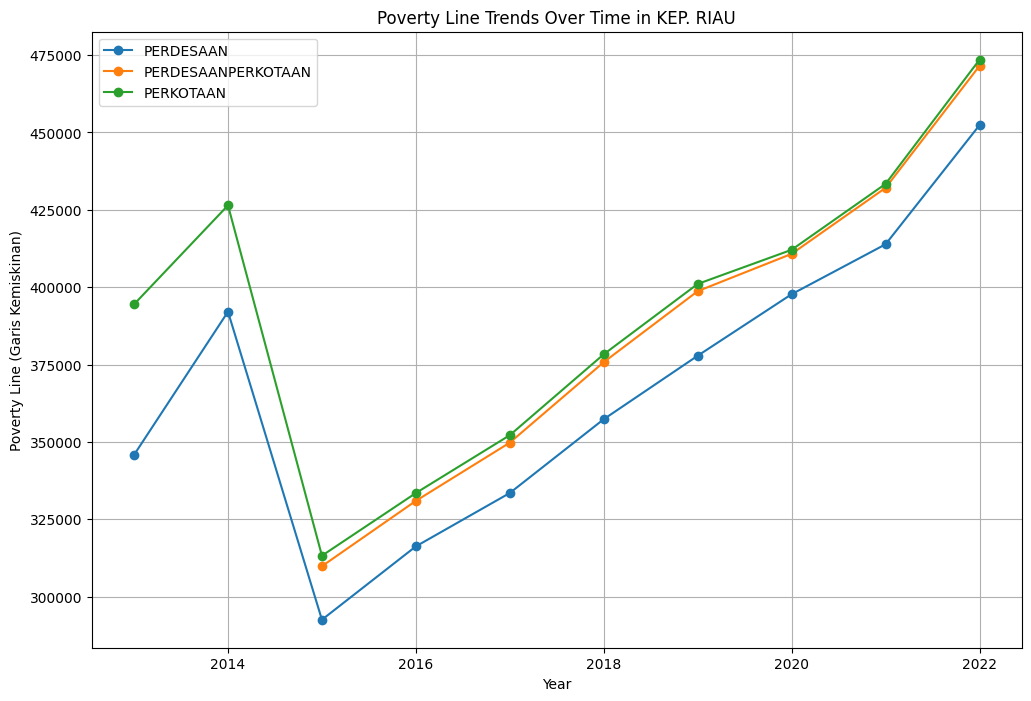

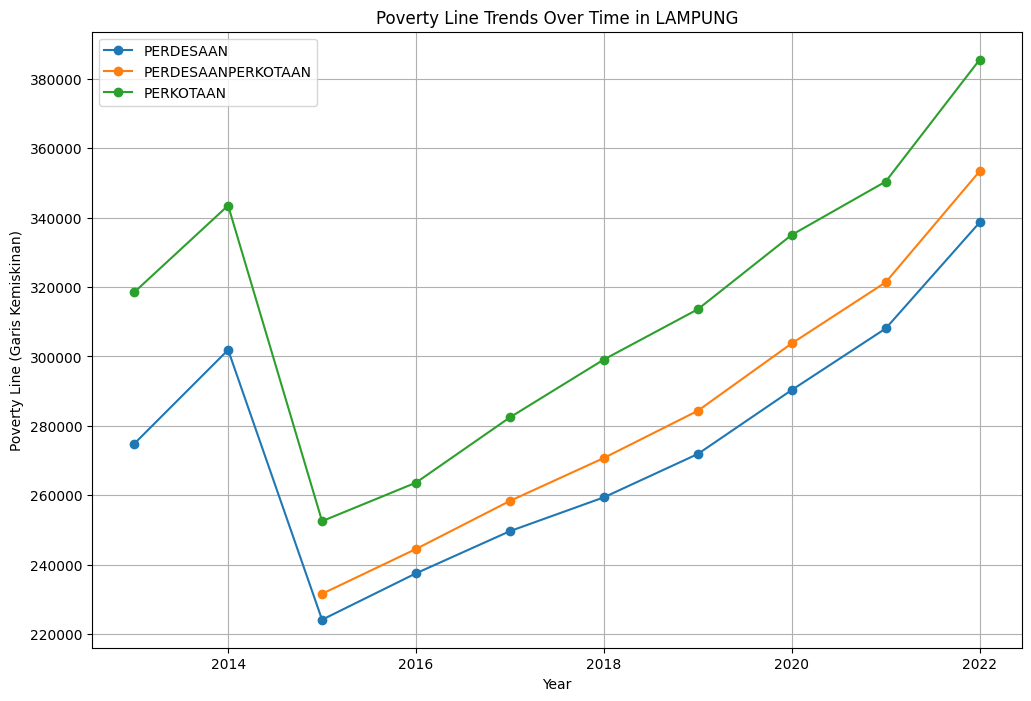

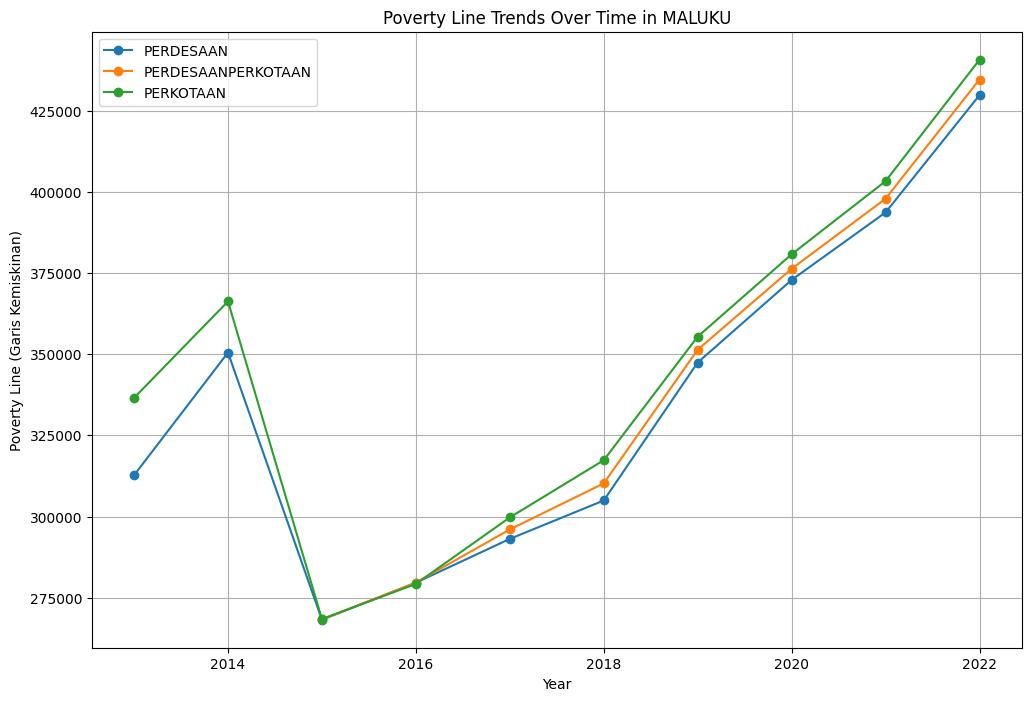

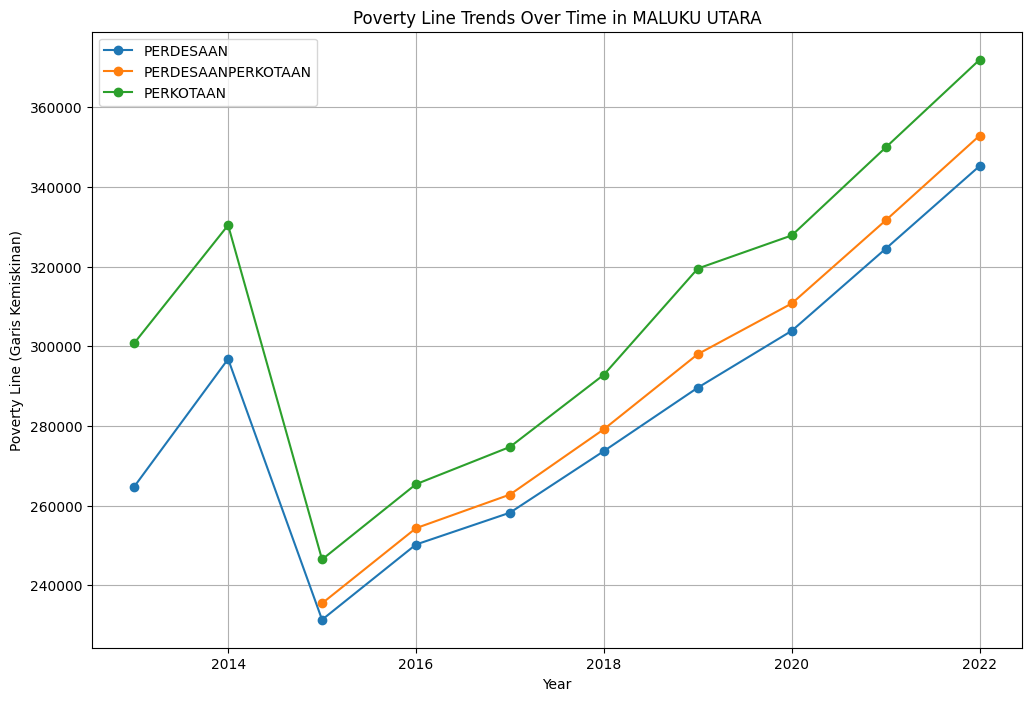

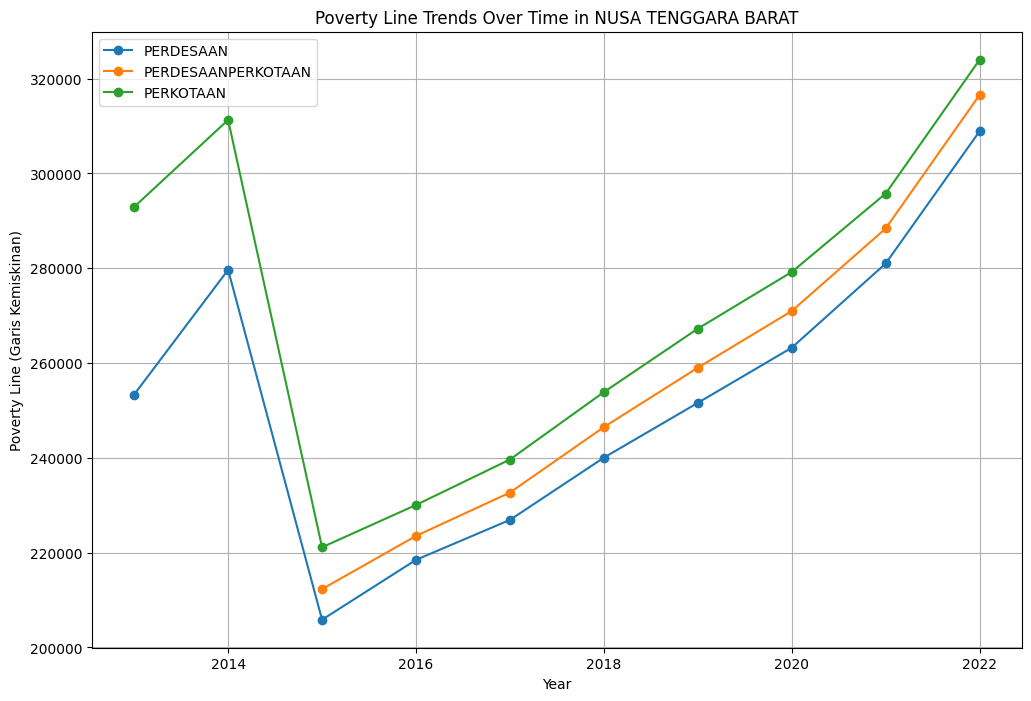

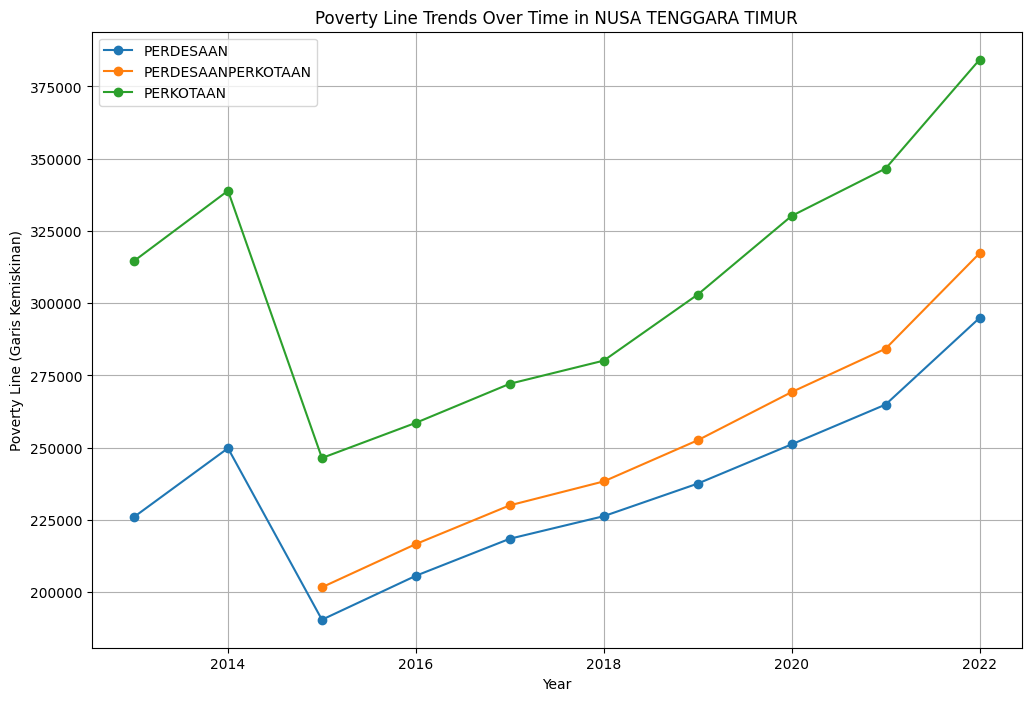

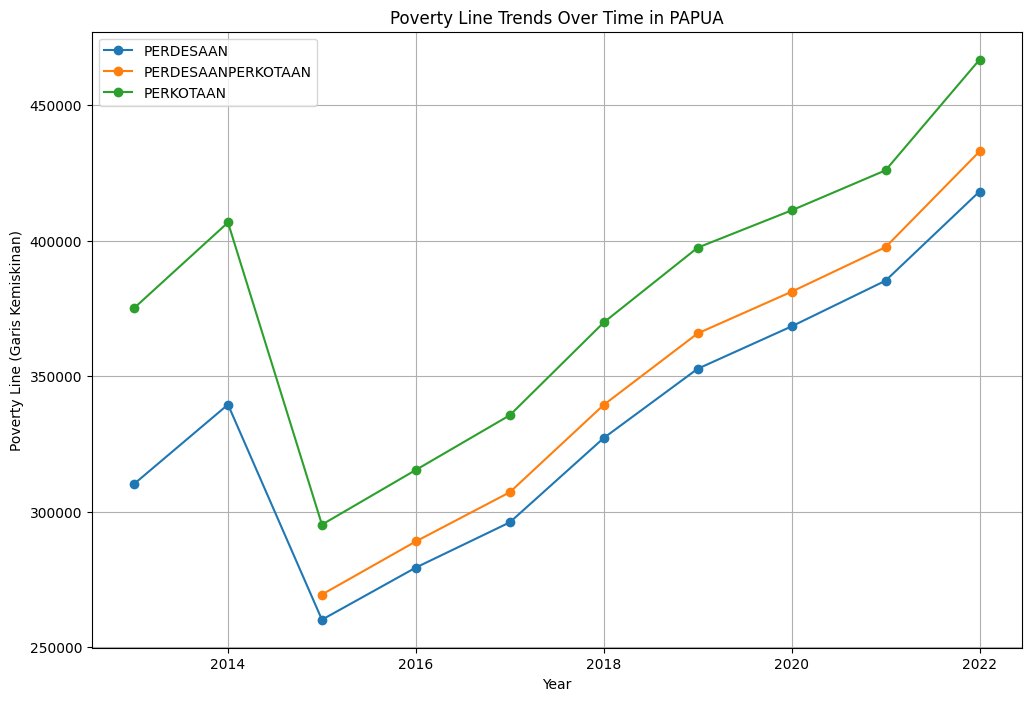

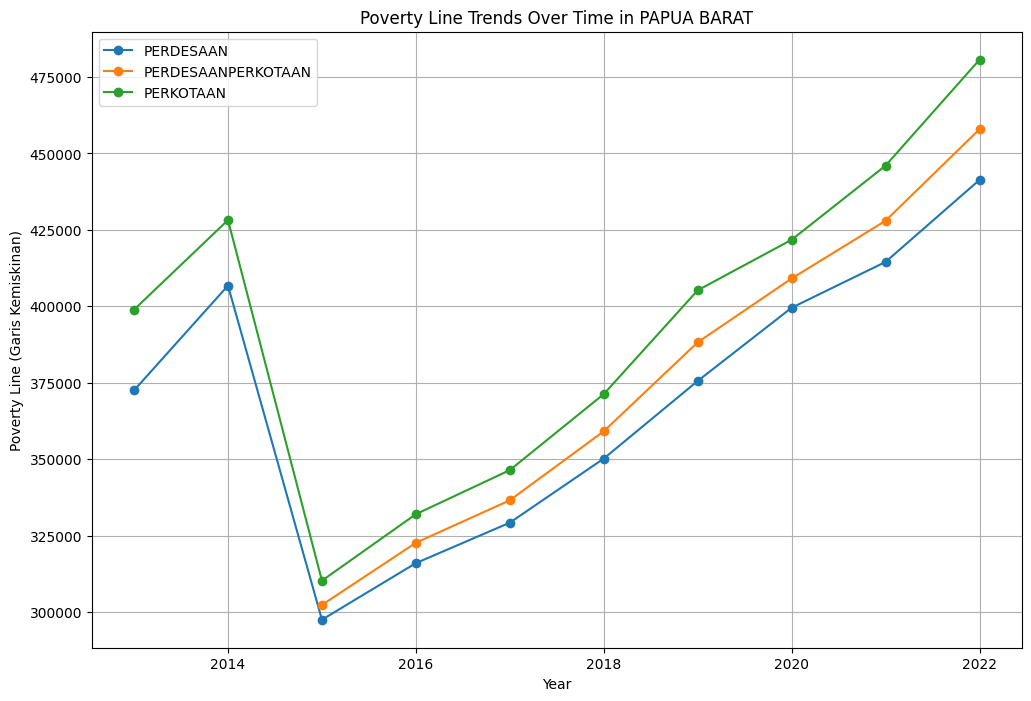

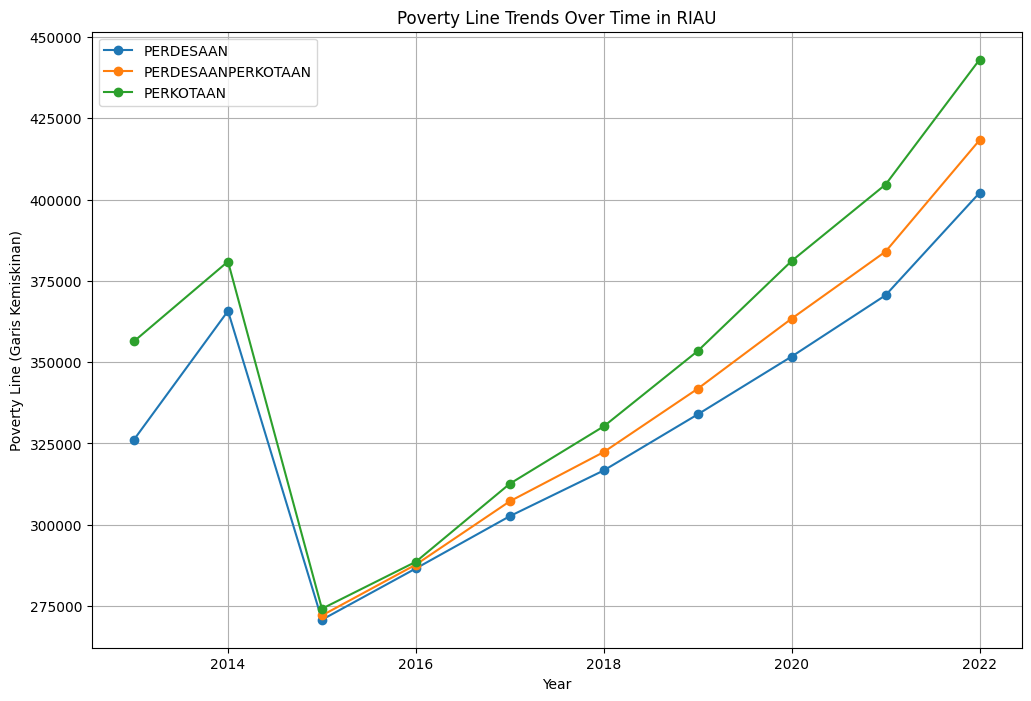

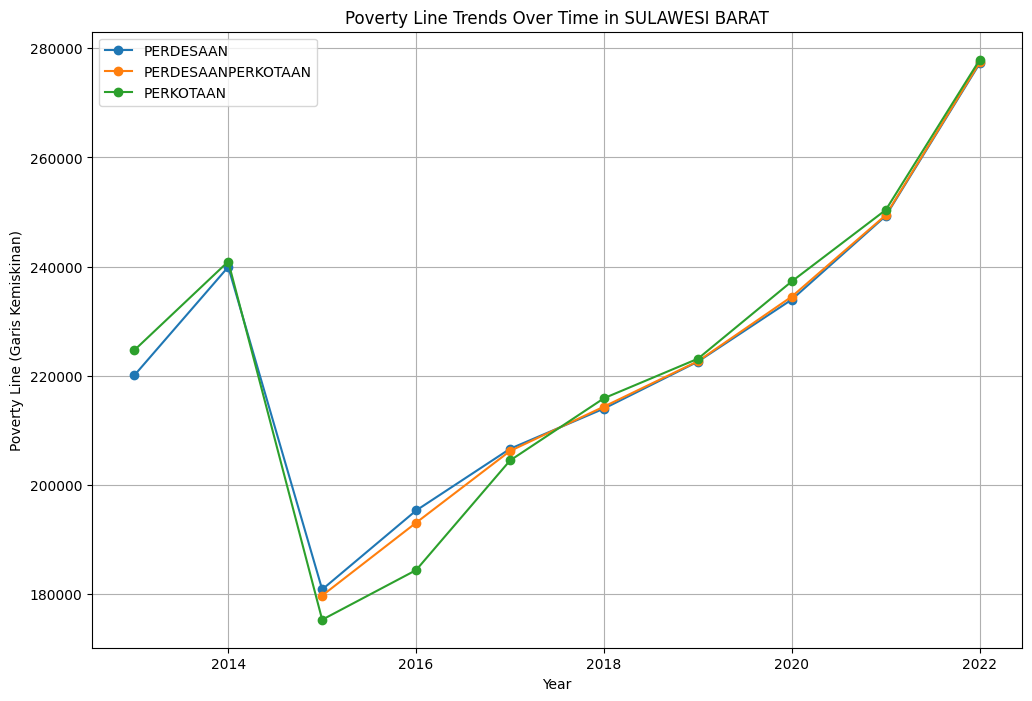

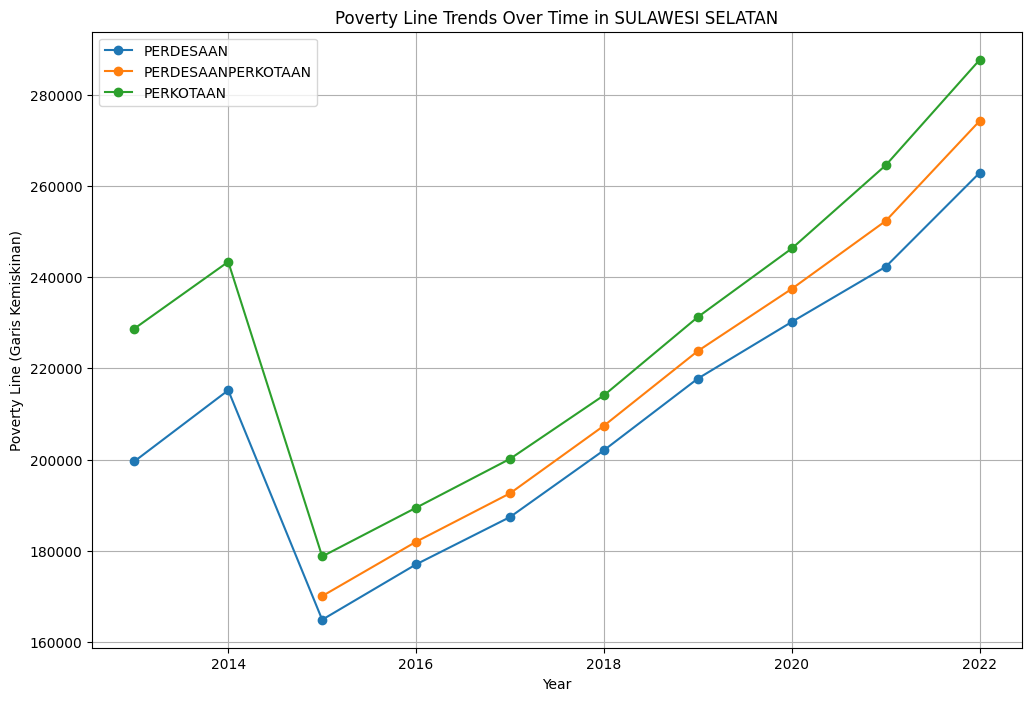

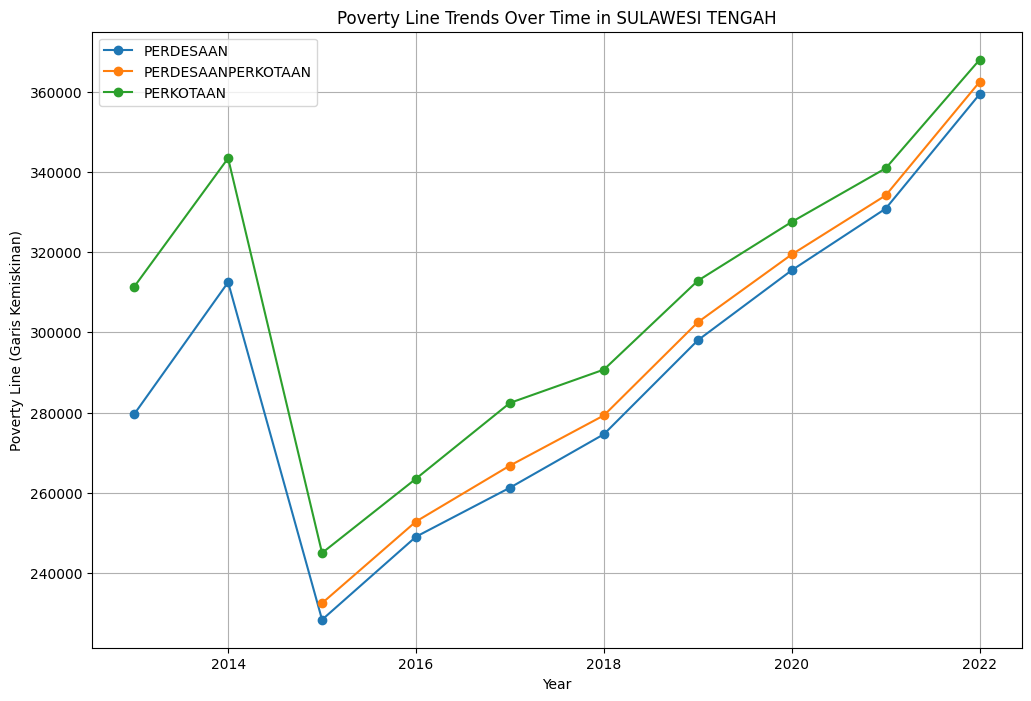

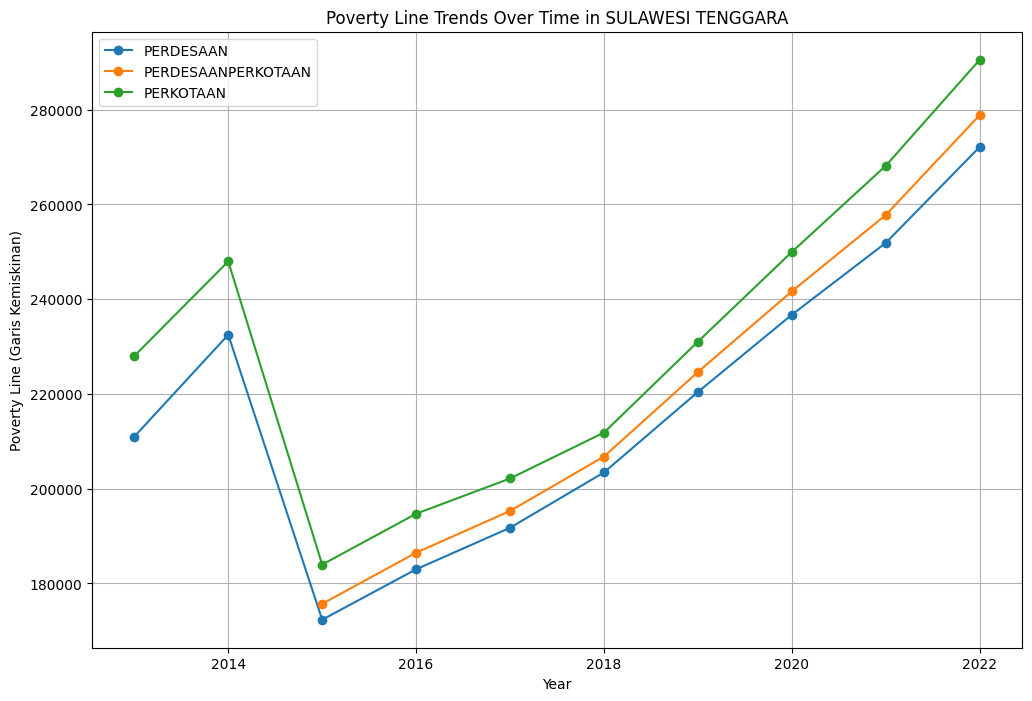

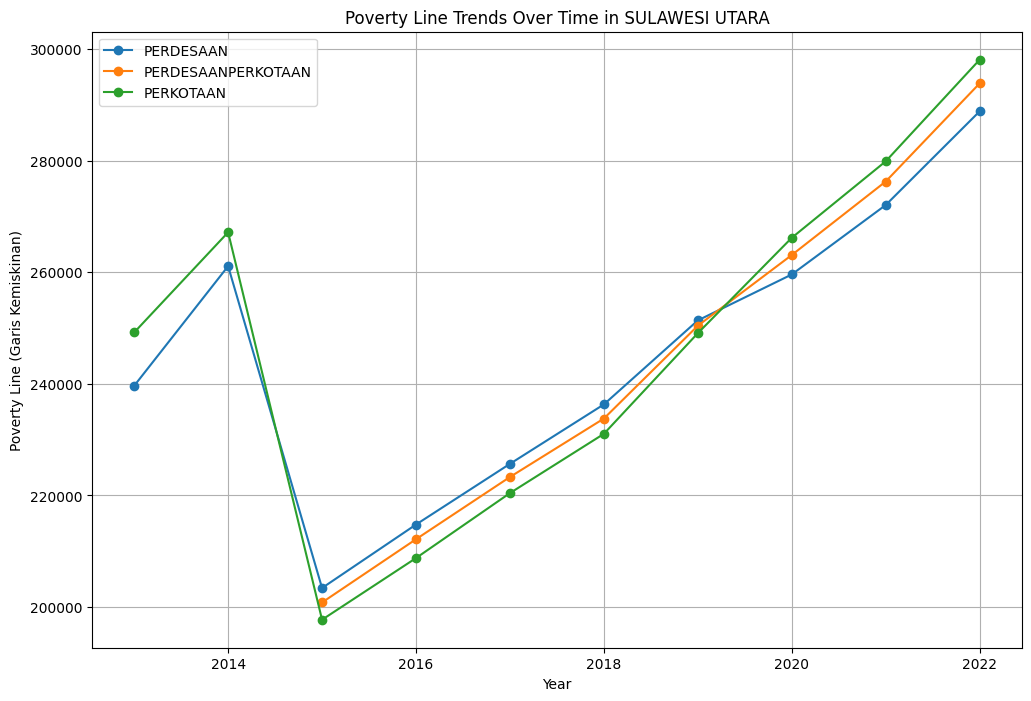

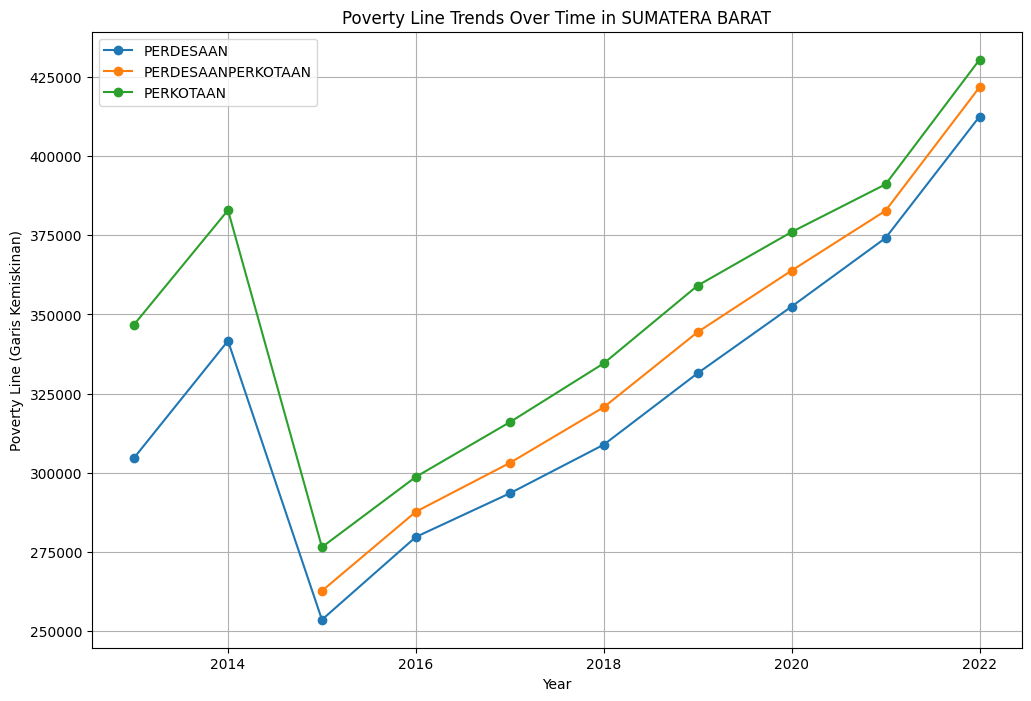

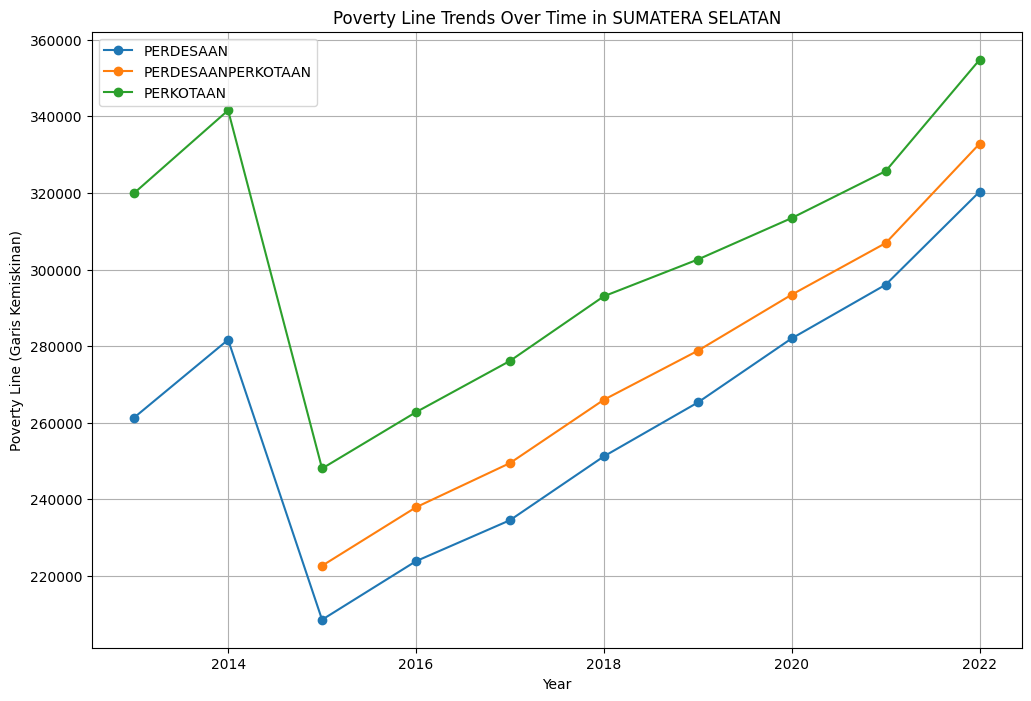

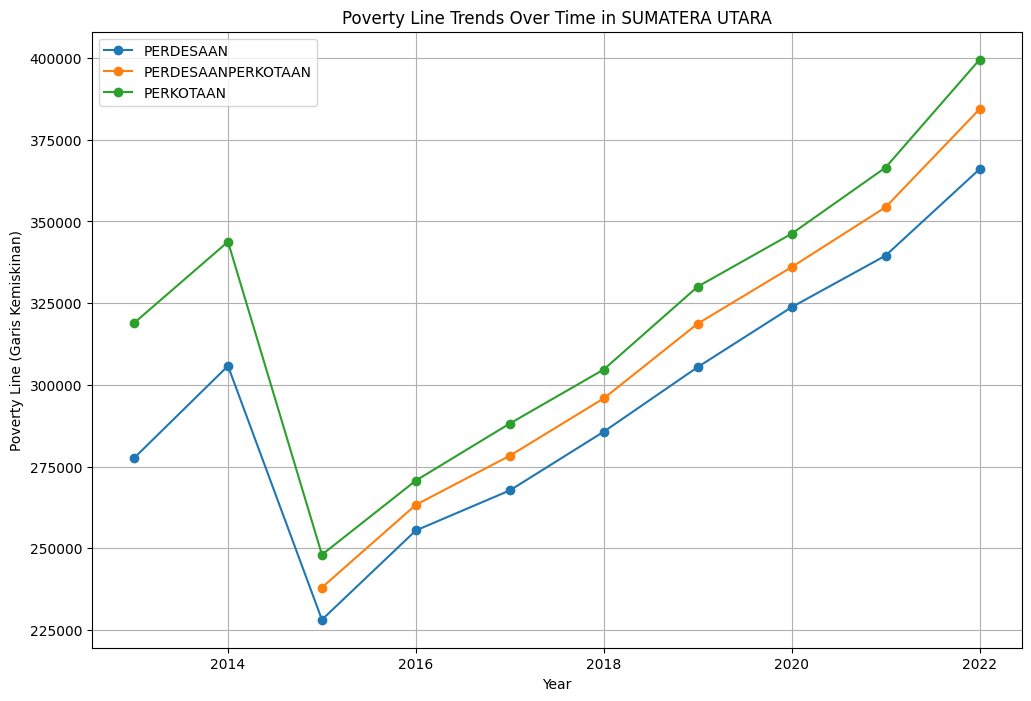

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
gk_df = pd.read_csv('pekerja/gk.df.csv')  # Poverty Line dataset

# Group by 'provinsi', 'tahun', and optionally 'daerah' (urban/rural)
gk_df_grouped = gk_df.groupby(['provinsi', 'tahun', 'daerah'], as_index=False)['gk'].mean()

# Display the grouped dataframe to verify
print(gk_df_grouped.head())

# Plot poverty line trends over time for each province
for provinsi in gk_df_grouped['provinsi'].unique():
    prov_data = gk_df_grouped[gk_df_grouped['provinsi'] == provinsi]

    plt.figure(figsize=(12, 8))
    for daerah in prov_data['daerah'].unique():
        daerah_data = prov_data[prov_data['daerah'] == daerah]
        plt.plot(daerah_data['tahun'], daerah_data['gk'], label=f"{daerah}", marker='o')

    plt.title(f'Poverty Line Trends Over Time in {provinsi}')
    plt.xlabel('Year')
    plt.ylabel('Poverty Line (Garis Kemiskinan)')
    plt.grid(True)
    plt.legend()
    plt.show()


#Income Inequality Across Provinces


  provinsi  tahun   upah    jenis              daerah    periode        gk
0     ACEH   2015  11226  MAKANAN           PERKOTAAN      MARET  293697.0
1     ACEH   2015  11226  MAKANAN           PERKOTAAN  SEPTEMBER  302128.0
2     ACEH   2015  11226  MAKANAN           PERDESAAN      MARET  297479.0
3     ACEH   2015  11226  MAKANAN           PERDESAAN  SEPTEMBER  306737.0
4     ACEH   2015  11226  MAKANAN  PERDESAANPERKOTAAN      MARET  296406.0


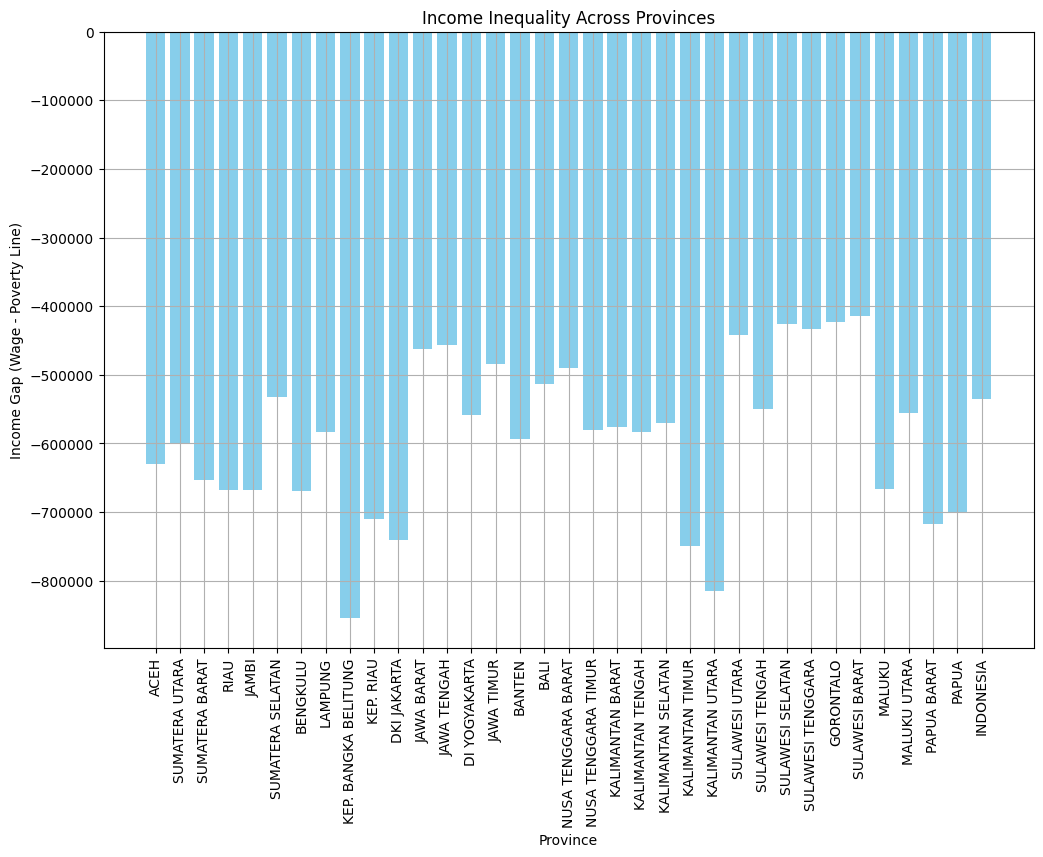

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
upah_df = pd.read_csv('pekerja/upah.df.csv')  # Average Hourly Wage dataset
gk_df = pd.read_csv('pekerja/gk.df.csv')  # Poverty Line dataset

# Merge datasets on 'provinsi' and 'tahun'
merged_df = pd.merge(upah_df, gk_df, on=['provinsi', 'tahun'], how='inner')

# Ensure 'upah' and 'gk' are numeric
merged_df['upah'] = pd.to_numeric(merged_df['upah'], errors='coerce')
merged_df['gk'] = pd.to_numeric(merged_df['gk'], errors='coerce')

# Display the merged dataframe to verify
print(merged_df.head())

# Calculate income inequality as the difference between average wage and poverty line
merged_df['income_gap'] = merged_df['upah'] - merged_df['gk']

# Plot income inequality across provinces
plt.figure(figsize=(12, 8))
plt.bar(merged_df['provinsi'], merged_df['income_gap'], color='skyblue')
plt.title('Income Inequality Across Provinces')
plt.xlabel('Province')
plt.ylabel('Income Gap (Wage - Poverty Line)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


#Impact of Economic Policies


  provinsi  tahun   upah        ump  jenis_x   daerah_x periode        gk  \
0     ACEH   2015  11226  1900000.0  MAKANAN  PERKOTAAN   MARET  293697.0   
1     ACEH   2015  11226  1900000.0  MAKANAN  PERKOTAAN   MARET  293697.0   
2     ACEH   2015  11226  1900000.0  MAKANAN  PERKOTAAN   MARET  293697.0   
3     ACEH   2015  11226  1900000.0  MAKANAN  PERKOTAAN   MARET  293697.0   
4     ACEH   2015  11226  1900000.0  MAKANAN  PERKOTAAN   MARET  293697.0   

    daerah_y     jenis_y      peng  
0  PERDESAAN     MAKANAN  395136.0  
1  PERDESAAN  NONMAKANAN  260183.0  
2  PERDESAAN       TOTAL  655319.0  
3  PERKOTAAN     MAKANAN  466355.0  
4  PERKOTAAN  NONMAKANAN  529945.0  


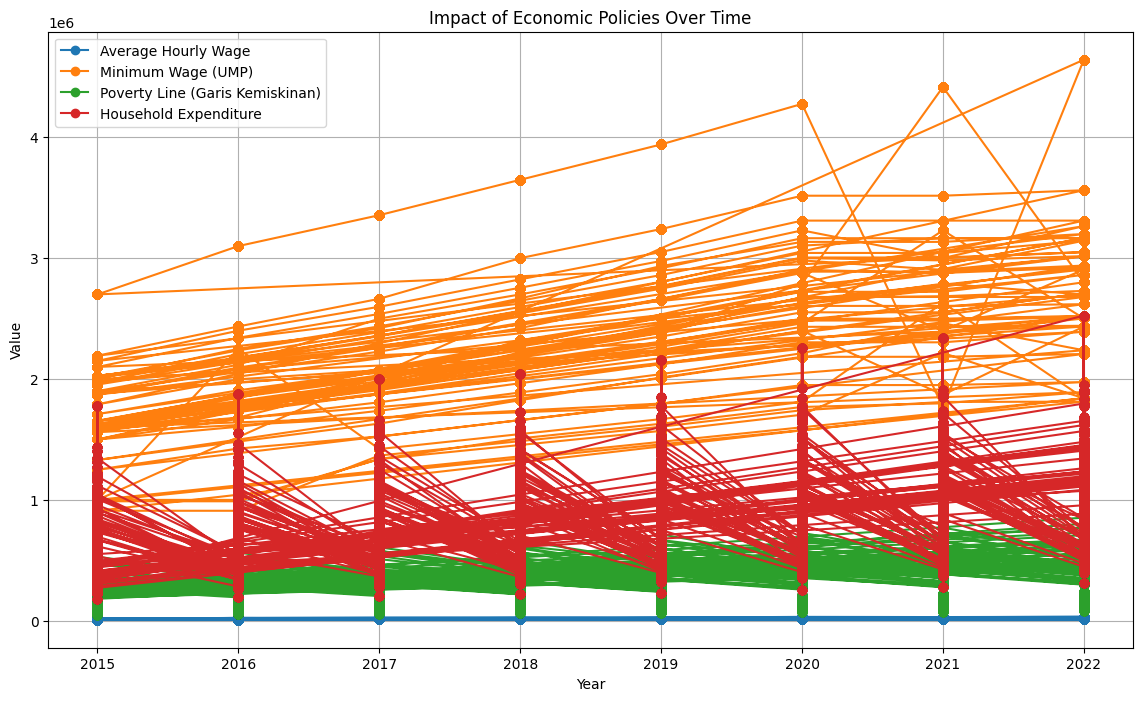

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load all necessary datasets
upah_df = pd.read_csv('pekerja/upah.df.csv')  # Average Hourly Wage dataset
ump_df = pd.read_csv('pekerja/ump.df.csv')  # Minimum Wage dataset
gk_df = pd.read_csv('pekerja/gk.df.csv')  # Poverty Line dataset
peng_df = pd.read_csv('pekerja/peng.df.csv')  # Household Expenditure dataset

# Merge datasets on 'provinsi' and 'tahun'
merged_df = upah_df.merge(ump_df, on=['provinsi', 'tahun'], how='inner')
merged_df = merged_df.merge(gk_df, on=['provinsi', 'tahun'], how='inner')
merged_df = merged_df.merge(peng_df, on=['provinsi', 'tahun'], how='inner')

# Display the merged dataframe to verify
print(merged_df.head())

# Plot to show the impact of economic policies (this is a simple example, adjust based on the policy/event)
plt.figure(figsize=(14, 8))
plt.plot(merged_df['tahun'], merged_df['upah'], label='Average Hourly Wage', marker='o')
plt.plot(merged_df['tahun'], merged_df['ump'], label='Minimum Wage (UMP)', marker='o')
plt.plot(merged_df['tahun'], merged_df['gk'], label='Poverty Line (Garis Kemiskinan)', marker='o')
plt.plot(merged_df['tahun'], merged_df['peng'], label='Household Expenditure', marker='o')

plt.title('Impact of Economic Policies Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


#Correlation Analysis Between Key Variables


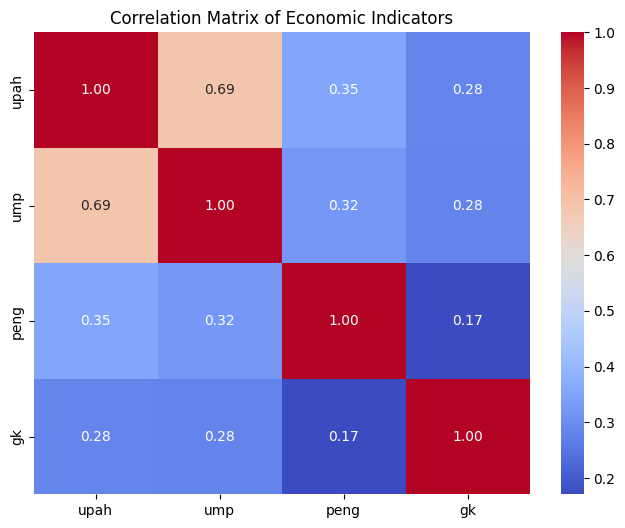

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
upah_df = pd.read_csv('pekerja/upah.df.csv')
ump_df = pd.read_csv('pekerja/ump.df.csv')
peng_df = pd.read_csv('pekerja/peng.df.csv')
gk_df = pd.read_csv('pekerja/gk.df.csv')

# Merge datasets on 'provinsi' and 'tahun'
merged_df = upah_df.merge(ump_df, on=['provinsi', 'tahun'], how='inner') \
                   .merge(peng_df, on=['provinsi', 'tahun'], how='inner') \
                   .merge(gk_df, on=['provinsi', 'tahun'], how='inner')

# Convert relevant columns to numeric
cols_to_numeric = ['upah', 'ump', 'peng', 'gk']
for col in cols_to_numeric:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Drop rows with missing values
merged_df.dropna(subset=cols_to_numeric, inplace=True)

# Compute correlation matrix
corr_matrix = merged_df[cols_to_numeric].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Economic Indicators')
plt.show()


#Gini Coefficient Calculation for Income Inequality



<ipython-input-20-d43cf47f45d9>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gini_coefficient', y='provinsi', data=gini_df, palette='viridis')


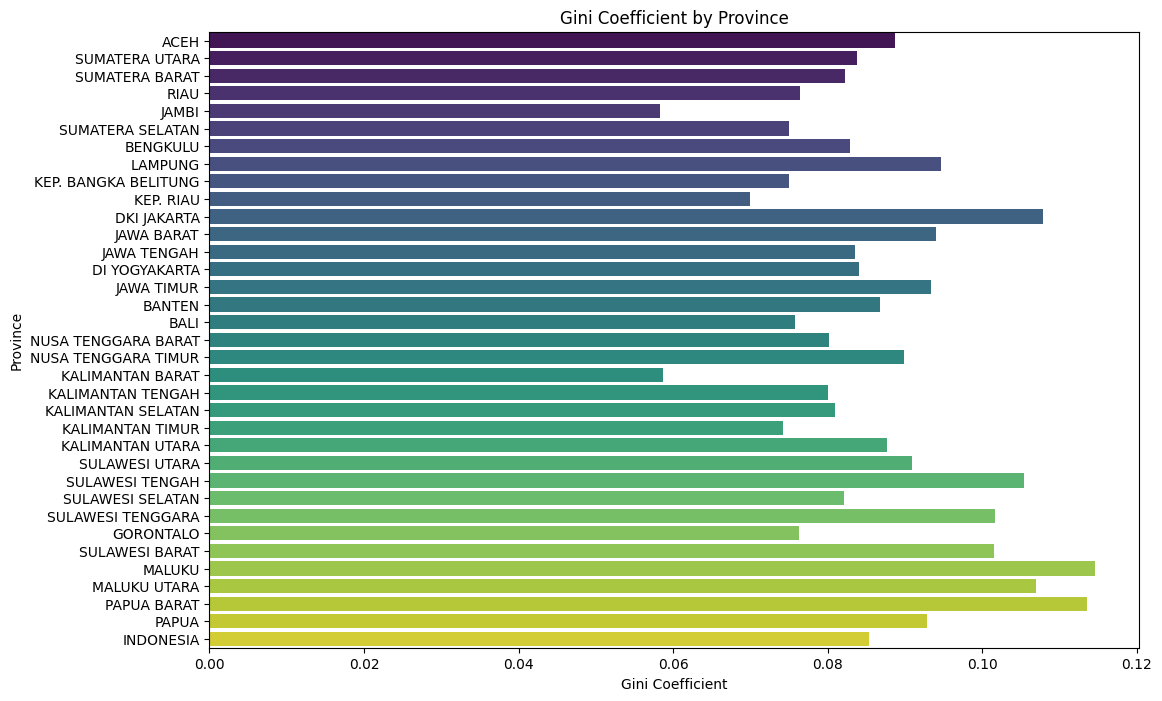

In [ ]:
import pandas as pd
import numpy as np

def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    array = np.sort(array)
    n = array.size
    cumulative = np.cumsum(array)
    relative_mean = cumulative / cumulative[-1]
    return 1 - 2 * np.trapz(relative_mean, dx=1/n)

# Assuming 'upah_df' has individual wage data; if it only has average wages, this method isn't applicable
# If you have individual wage data, proceed as follows:

# Example: Calculate Gini for each province
gini_list = []
for provinsi in upah_df['provinsi'].unique():
    prov_data = upah_df[upah_df['provinsi'] == provinsi]['upah'].dropna()
    if len(prov_data) > 0:
        gini_coeff = gini(prov_data.values)
        gini_list.append({'provinsi': provinsi, 'gini_coefficient': gini_coeff})

gini_df = pd.DataFrame(gini_list)

# Plot Gini coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='gini_coefficient', y='provinsi', data=gini_df, palette='viridis')
plt.title('Gini Coefficient by Province')
plt.xlabel('Gini Coefficient')
plt.ylabel('Province')
plt.show()


# Comparative Box Plots for Distribution Analysis


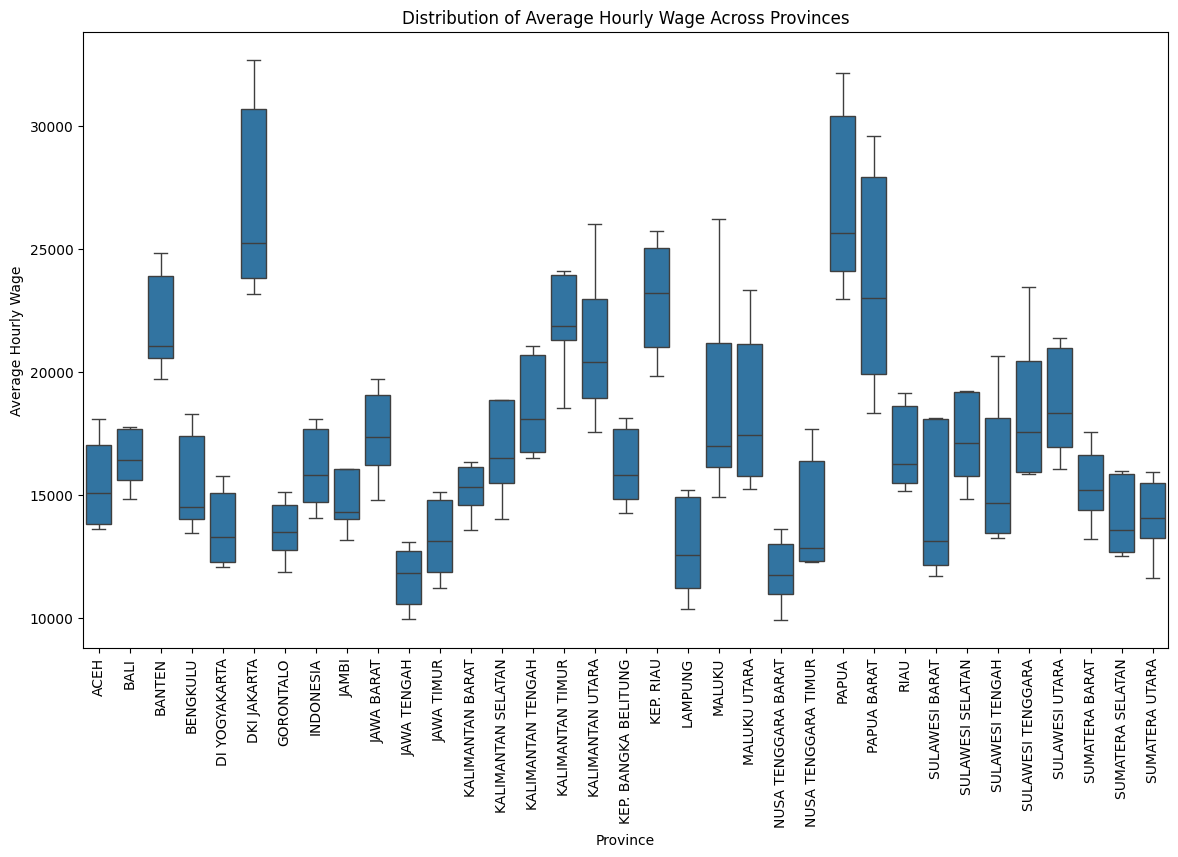

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Average Hourly Wage across Provinces
plt.figure(figsize=(14, 8))
sns.boxplot(x='provinsi', y='upah', data=merged_df)
plt.title('Distribution of Average Hourly Wage Across Provinces')
plt.xlabel('Province')
plt.ylabel('Average Hourly Wage')
plt.xticks(rotation=90)
plt.show()

# Box plot for Household Expenditure before and after Policy
if 'policy_period' in merged_df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='policy_period', y='peng', data=merged_df)
    plt.title('Household Expenditure Before and After Policy')
    plt.xlabel('Policy Period')
    plt.ylabel('Household Expenditure')
    plt.show()
